In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-anxiety-dataset/anxiety.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/student-anxiety-dataset/anxiety.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [5]:
df.shape

(13464, 55)

In [6]:
df.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [7]:
df.drop(['S. No.','Timestamp'],axis = 1, inplace = True)

In [8]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GAD1,13464.0,0.860963,0.926542,0.0,0.0,1.0,1.0,3.0
GAD2,13464.0,0.673351,0.915724,0.0,0.0,0.0,1.0,3.0
GAD3,13464.0,0.965761,0.982776,0.0,0.0,1.0,2.0,3.0
GAD4,13464.0,0.724079,0.921971,0.0,0.0,0.0,1.0,3.0
GAD5,13464.0,0.488042,0.837014,0.0,0.0,0.0,1.0,3.0
GAD6,13464.0,0.911022,0.931168,0.0,0.0,1.0,1.0,3.0
GAD7,13464.0,0.588755,0.894408,0.0,0.0,0.0,1.0,3.0
SWL1,13464.0,3.720440,1.736264,1.0,2.0,4.0,5.0,7.0
SWL2,13464.0,4.602050,1.696276,1.0,3.0,5.0,6.0,7.0
SWL3,13464.0,4.345440,1.809430,1.0,3.0,5.0,6.0,7.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 53 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GAD1             13464 non-null  int64  
 1   GAD2             13464 non-null  int64  
 2   GAD3             13464 non-null  int64  
 3   GAD4             13464 non-null  int64  
 4   GAD5             13464 non-null  int64  
 5   GAD6             13464 non-null  int64  
 6   GAD7             13464 non-null  int64  
 7   GADE             12815 non-null  object 
 8   SWL1             13464 non-null  int64  
 9   SWL2             13464 non-null  int64  
 10  SWL3             13464 non-null  int64  
 11  SWL4             13464 non-null  int64  
 12  SWL5             13464 non-null  int64  
 13  Game             13464 non-null  object 
 14  Platform         13464 non-null  object 
 15  Hours            13434 non-null  float64
 16  earnings         13464 non-null  object 
 17  whyplay     

In [11]:
df.isna().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1838
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Gender                 0


In [12]:
df.drop('highestleague',axis = 1, inplace = True)

In [13]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [14]:
for col in df.columns:
    print('-'*15)
    print(df[col].value_counts().head(15))
    print("The the number of rows in ",col,":",df[col].shape[0])
    print('-'*15)

---------------
0    5694
1    5099
2    1520
3    1151
Name: GAD1, dtype: int64
The the number of rows in  GAD1 : 13464
---------------
---------------
0    7616
1    3576
2    1326
3     946
Name: GAD2, dtype: int64
The the number of rows in  GAD2 : 13464
---------------
---------------
0    5319
1    4708
2    2016
3    1421
Name: GAD3, dtype: int64
The the number of rows in  GAD3 : 13464
---------------
---------------
0    7129
1    3884
2    1488
3     963
Name: GAD4, dtype: int64
The the number of rows in  GAD4 : 13464
---------------
---------------
0    9236
1    2576
2     961
3     691
Name: GAD5, dtype: int64
The the number of rows in  GAD5 : 13464
---------------
---------------
0    5386
1    4993
2    1982
3    1103
Name: GAD6, dtype: int64
The the number of rows in  GAD6 : 13464
---------------
---------------
0    8444
1    2961
2    1211
3     848
Name: GAD7, dtype: int64
The the number of rows in  GAD7 : 13464
---------------
---------------
Not difficult at all    6

In [15]:
df.isnull().sum()

GAD1                  0
GAD2                  0
GAD3                  0
GAD4                  0
GAD5                  0
GAD6                  0
GAD7                  0
GADE                649
SWL1                  0
SWL2                  0
SWL3                  0
SWL4                  0
SWL5                  0
Game                  0
Platform              0
Hours                30
earnings              0
whyplay               0
League             1838
streams             100
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Gender                0
Age                   0
Work                 38
Degree          

In [16]:
df.dtypes

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                object
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                object
Platform            object
Hours              float64
earnings            object
whyplay             object
League              object
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
SPIN17             float64
N

# Column with null values
    * GADE, Hours, League,streams,SPIN1 - SPIN17, Narcissism, Work, Reference, accep, SPIN_T, Residence_ISO3, Birthplace_ISO3

In [17]:
df['GADE'].unique()

array(['Not difficult at all', 'Somewhat difficult', 'Very difficult',
       nan, 'Extremely difficult'], dtype=object)

In [18]:
df['GADE'].isna().sum()

649

In [19]:
df['GADE'].value_counts()

Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64

In [20]:
df['GADE'].fillna(df['GADE'].value_counts().index[1],inplace = True)

In [21]:
df['GADE'].value_counts()

Not difficult at all    6236
Somewhat difficult      5797
Very difficult          1012
Extremely difficult      419
Name: GADE, dtype: int64

In [22]:
df['Hours'].fillna(int(df['Hours'].mean()),inplace = True)

In [23]:
df['streams'].fillna(int(df['streams'].mean()),inplace = True)

In [24]:
df['League'].isna().sum()

1838

In [25]:
df['League'].unique()

array([nan, '-', 'Gold', ..., 'Not ranked yet S5, Plat IV S4.',
       "Season 4: Diamond II Right now: Platinum I (haven't played much)",
       'AHGL'], dtype=object)

In [26]:
df['League'] = df['League'].str.lower().str.strip()
df['League'].unique()
print(df['League'].nunique())

1209


In [27]:
df['League'] = df['League'].str.extract(r'^([a-z]+)')

In [28]:
df['League'].unique()

array([nan, 'gold', 'none', 'na', 'diamond', 'not', 'bronze', 'silver',
       'n', 'unranked', 'i', 'bad', 'legendary', 'global', 'potato',
       'master', 'silverii', 'platinum', 'masters', 'challenger', 'lvl',
       'platin', 'promos', 'top', 'd', 'plat', 'rank', 'grandmaster',
       'platnium', 's', 'haven', 'platinium', 'in', 'gv', 'provisional',
       'placements', 'g', 'was', 'the', 'division', 'pplatinum', 'hr',
       'only', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'dont', 'high', 'very', 'starcraft', 'challenjour',
       'fusion', 'low', 'unraked', 'havent', 'got', 'golden', 'cs', 'p',
       'standard', 'still', 'highest', 'nope', 'dia', 'league', 'nova',
       'mge', 'silber', 'siver', 'never', 'b', 'platinun', 'mg',
       'supreme', 'for', 'greater', 'wood', 'le', 'no', 'natural', 'aram',
       'don', 'currently', 'noone', 'grand', 'hs', 'current', 'last',
       'first', 'recently', 'fucking', 'grandmasters', 'golf', 'of',
       'glod'

In [29]:
df.loc[(df['whyplay'] == 'having fun'),'League'] = df.loc[(df['whyplay'] == 'having fun'),'League'].fillna('ranked')

In [30]:
df['League'].fillna('gold',inplace = True)

In [31]:
print([i for i in df['League'].unique() if i.startswith('g')])

['gold', 'global', 'grandmaster', 'gv', 'g', 'got', 'golden', 'greater', 'grand', 'grandmasters', 'golf', 'glod', 'golld', 'goled', 'german', 'germany', 'god', 'gladiator', 'gm', 'golderino', 'giii', 'guardian']


In [32]:
gold = ['g','gv','golden','golf','glod','golld','goled','golderino','giii']
df["League"] = df['League'].replace(gold,'gold')

In [33]:
print([i for i in df['League'].unique() if i.startswith('s')])

['silver', 'silverii', 's', 'sliver', 'starcraft', 'standard', 'still', 'silber', 'siver', 'supreme', 'soloq', 'sil', 'season', 'spanish', 'sc', 'seaon', 'seeding', 'smfc', 'silveriv', 'sem']


In [34]:
silver = ['silverii','s','sliver','silber','siver','sil','silveriv']
df['League'] = df['League'].replace(silver,'silver')

In [35]:
print([i for i in df['League'].unique() if i.startswith('p')])

['potato', 'platinum', 'platin', 'promos', 'plat', 'platnium', 'platinium', 'provisional', 'placements', 'pplatinum', 'platium', 'platine', 'plarinum', 'p', 'platinun', 'platonum', 'plata', 'platnum', 'placed', 'plantinum', 'placement', 'platinuim', 'pre', 'promotion', 'probably', 'peaked', 'platunum', 'platinumm', 'provisionals', 'promotions', 'platv', 'platina']


In [36]:
plat = ['platinum','platin','plat','platnium','platinium','pplatinum','platium','plarinum','p','platinun','platonum','plata','platnum','plantinum','platinuim','platunum','platinumm','platv','platina','platine']
df['League'] = df['League'].replace(plat,'platinum')

In [37]:
print([i for i in df['League'].unique() if i.startswith('p')])

['potato', 'platinum', 'promos', 'provisional', 'placements', 'placed', 'placement', 'pre', 'promotion', 'probably', 'peaked', 'provisionals', 'promotions']


In [38]:
print([i for i in df['League'].unique() if i.startswith('b')])

['bronze', 'bad', 'b', 'bronce', 'broze']


In [39]:
bronze = ['bronze','b','bronce','broze','lowest','wood','elohell']
df['League'] = df['League'].replace(bronze,'bronze')

In [40]:
unranked = ['none' ,'na', 'not' ,'n' ,'promos' ,'provisional' ,'placements' , 'dont' , 'was', 'unraked',
            'havent', 'never', 'nope', 'no', 'noone', 'don', 'of', 'unrranked', 'new', 'what', 'unrank' ,
            'ranked', 'placement', 'unrankt' , 'non', 'unfranked' , 'promotion', 'idk',
            'unplaced', 'probably', 'provisionals', 'didnt' ,'unrakned' , 'unfinished' , 'just' , 'x' ,
            'promotions' , 'unseeded' , 'haven']
df['League'] = df['League'].replace(unranked , 'unranked')

In [41]:
print([i for i in df['League'].unique() if i.startswith('d')])

['diamond', 'd', 'division', 'dmg', 'dia', 'double', 'diaomnd', 'diamont', 'distinguished', 'doing', 'diamomd']


In [42]:
diamond = ['d','dia','diaomnd','diamont','diamomd']
df['League'] = df['League'].replace(diamond,'diamond')

In [43]:
print([i for i in df['League'].unique() if i.startswith('g')])

['gold', 'global', 'grandmaster', 'got', 'greater', 'grand', 'grandmasters', 'german', 'germany', 'god', 'gladiator', 'gm', 'guardian']


In [44]:
grandmaster = ['grand','grandmasters','gm']
df['League'] = df['League'].replace(grandmaster,'grandmaster')

In [45]:
print([i for i in df['League'].unique() if i.startswith('c')])

['challenger', 'challenjour', 'cs', 'currently', 'current', 'challenged', 'csgo', 'c', 'cardboard', 'conqueror', 'charrenjour', 'close', 'complete', 'coals', 'climbing', 'challeneger']


In [46]:
challengers = ['challenjour','c','challenged','charrenjour','challeneger']
df['League'] = df['League'].replace(challengers,'challenger')

In [47]:
df['League'] = df.League.replace('mg' , 'mge')
df['League'] = df.League.replace('masters' , 'master')
df['League'] = df.League.replace( ['le', 'legdendary'] , 'legendary')

In [48]:
counts = df['League'].value_counts()


In [49]:
df['League'] = df['League'][~df['League'].isin(counts[counts < 3].index)]

In [50]:
df['League'].value_counts()

gold           4087
platinum       2647
silver         2283
unranked       1720
diamond        1635
bronze          554
master          166
challenger       80
rank             28
i                21
grandmaster      18
dmg              12
currently        11
season            8
mge               8
legendary         8
high              8
lol               7
cs                7
still             7
league            7
in                7
top               6
legend            6
supreme           5
nova              5
greater           4
starcraft         3
last              3
lem               3
csgo              3
Name: League, dtype: int64

In [51]:
df['League'] = df.League.replace(['i' , 'currently' , 'high' , 'season' , 'lol','cs' ,
                                  'last' ,'csgo','starcraft' ,'geater' , 'in', 'rank' , 'still'] , np.nan)

In [52]:
df['League'].fillna('unspecified',inplace = True)

In [53]:
df['League'].unique()

array(['unranked', 'gold', 'diamond', 'bronze', 'silver', 'unspecified',
       'legendary', 'master', 'platinum', 'challenger', 'top',
       'grandmaster', 'legend', 'dmg', 'league', 'nova', 'mge', 'supreme',
       'greater', 'lem'], dtype=object)

In [54]:
df['Narcissism'].value_counts()

1.0    5259
2.0    4360
3.0    2341
4.0    1153
5.0     328
Name: Narcissism, dtype: int64

In [55]:
df.drop(["Birthplace","Birthplace_ISO3"],axis=1,inplace=True)

In [56]:
df.isna().sum()

GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
GADE                0
SWL1                0
SWL2                0
SWL3                0
SWL4                0
SWL5                0
Game                0
Platform            0
Hours               0
earnings            0
whyplay             0
League              0
streams             0
SPIN1             124
SPIN2             154
SPIN3             140
SPIN4             159
SPIN5             166
SPIN6             156
SPIN7             138
SPIN8             144
SPIN9             158
SPIN10            160
SPIN11            187
SPIN12            168
SPIN13            187
SPIN14            156
SPIN15            147
SPIN16            147
SPIN17            175
Narcissism         23
Gender              0
Age                 0
Work               38
Degree              0
Residence           0
Reference          15
Playstyle           0
accept    

In [57]:
df['Narcissism'].fillna(np.mean(df['Narcissism'].value_counts().index),inplace = True)

In [58]:
df['Residence'] = df['Residence'].replace('Unknown',df['Residence'].mode()[0])

In [59]:
df['Reference'].unique()

array(['Reddit', 'Other', 'TeamLiquid.net', 'CrowdFlower', nan],
      dtype=object)

In [60]:
df['Reference'].fillna('Other',inplace = True)

In [61]:
df.drop(df[df['accept'].isnull()].index,axis = 0, inplace = True)

In [62]:
df['Residence_ISO3'].fillna('USA',inplace = True)

In [63]:
df.loc[11063,'Residence_ISO3'] = 'XXK'

In [64]:
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9','SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17','SPIN_T']
for i in col:
    df[i].fillna(df[i].mode()[0],inplace = True)

In [65]:
df.isna().sum()

GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism         0
Gender             0
Age                0
Work              37
Degree             0
Residence          0
Reference          0
Playstyle          0
accept             0
GAD_T              0
SWL_T        

In [66]:
df['Playstyle'] = df['Playstyle'].apply(lambda x: " ".join(word.strip(st.punctuation) for word in x.split()))

In [67]:
df['earnings'] = df['earnings'].apply(lambda x: " ".join(word.strip(st.punctuation) for word in x.split()))

In [68]:
df['whyplay'] = df['whyplay'].apply(lambda x: " ".join(word.strip(st.punctuation) for word in x.split()))

In [69]:
df['Playstyle'].nunique()

286

In [70]:
df['Work'].mode()[0]

'Student at college / university'

In [71]:
df.fillna(df['Work'].mode()[0], inplace = True)

In [72]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Residence',
       'Reference', 'Playstyle', 'accept', 'GAD_T', 'SWL_T', 'SPIN_T',
       'Residence_ISO3'],
      dtype='object')

In [73]:
df.drop(['Residence','accept'],axis = 1, inplace = True)

In [74]:
df.earnings.value_counts().index[3:]

Index(['I play to win', 'i try', 'I play to improve', 'competitive drive',
       'I play for fun but am starting to stream', 'I don't earn jack ',
       'I play for relaxation and it gives me a few minutes to release everything',
       'making money from boosting,but mostly fun',
       'I play because it's installed',
       'I play because it is the only way i have to show i'm good at something',
       ...
       'For relief not necessarily fun',
       'i would love to make money by playing some day',
       'I got paid to play halo series and gears of war series started to play lol with the same intentions',
       'I play hoping one day I can be good enough to make a living out of it',
       'It is an escape and only thing I can do with my life at the moment',
       'I play for fun but if there's an opportunity to earn some money I would love to',
       'Keep in touch w friends',
       'I Play for fun and working on making earn out of it',
       'I play ranked mostly', 'S

In [75]:
df['earnings'].replace(df['earnings'].value_counts().index[3:] , 'Other',inplace=True)
df['earnings'].value_counts()

I play for fun                                                                           11742
I play mostly for fun but earn a little on the side tournament winnings streaming etc      966
Other                                                                                      297
I earn a living by playing this game                                                        45
Name: earnings, dtype: int64

In [76]:
df.whyplay.replace(df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
df['whyplay'].value_counts()

having fun          5151
improving           4744
winning             2035
relaxing             632
Other                457
All of the above      31
Name: whyplay, dtype: int64

In [77]:
df['Playstyle'].replace(df['Playstyle'].value_counts().index[5:],'Other',inplace = True)
df['Playstyle'].value_counts()

Multiplayer  online  with real life friends                    5441
Multiplayer  online  with strangers                            3986
Multiplayer  online  with online acquaintances or teammates    2555
Singleplayer                                                    730
Other                                                           294
Multiplayer  offline people in the same room                     44
Name: Playstyle, dtype: int64

In [78]:
df.Playstyle.replace('Other' , np.nan , inplace=True)
df.whyplay.replace('Other' , np.nan , inplace=True)
df.earnings.replace('Other' , np.nan , inplace=True)

In [79]:
df.dropna(inplace = True)

In [80]:
df.shape

(12131, 48)

In [81]:
pd.set_option('display.max_columns', None)
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,Singleplayer,1,23,5.0,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,unranked,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Reddit,Multiplayer online with strangers,8,16,33.0,USA
2,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,unranked,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Reddit,Singleplayer,8,17,31.0,DEU
3,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,gold,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),Reddit,Multiplayer online with online acquaintances...,0,17,11.0,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,unranked,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),Reddit,Multiplayer online with strangers,14,14,13.0,KOR


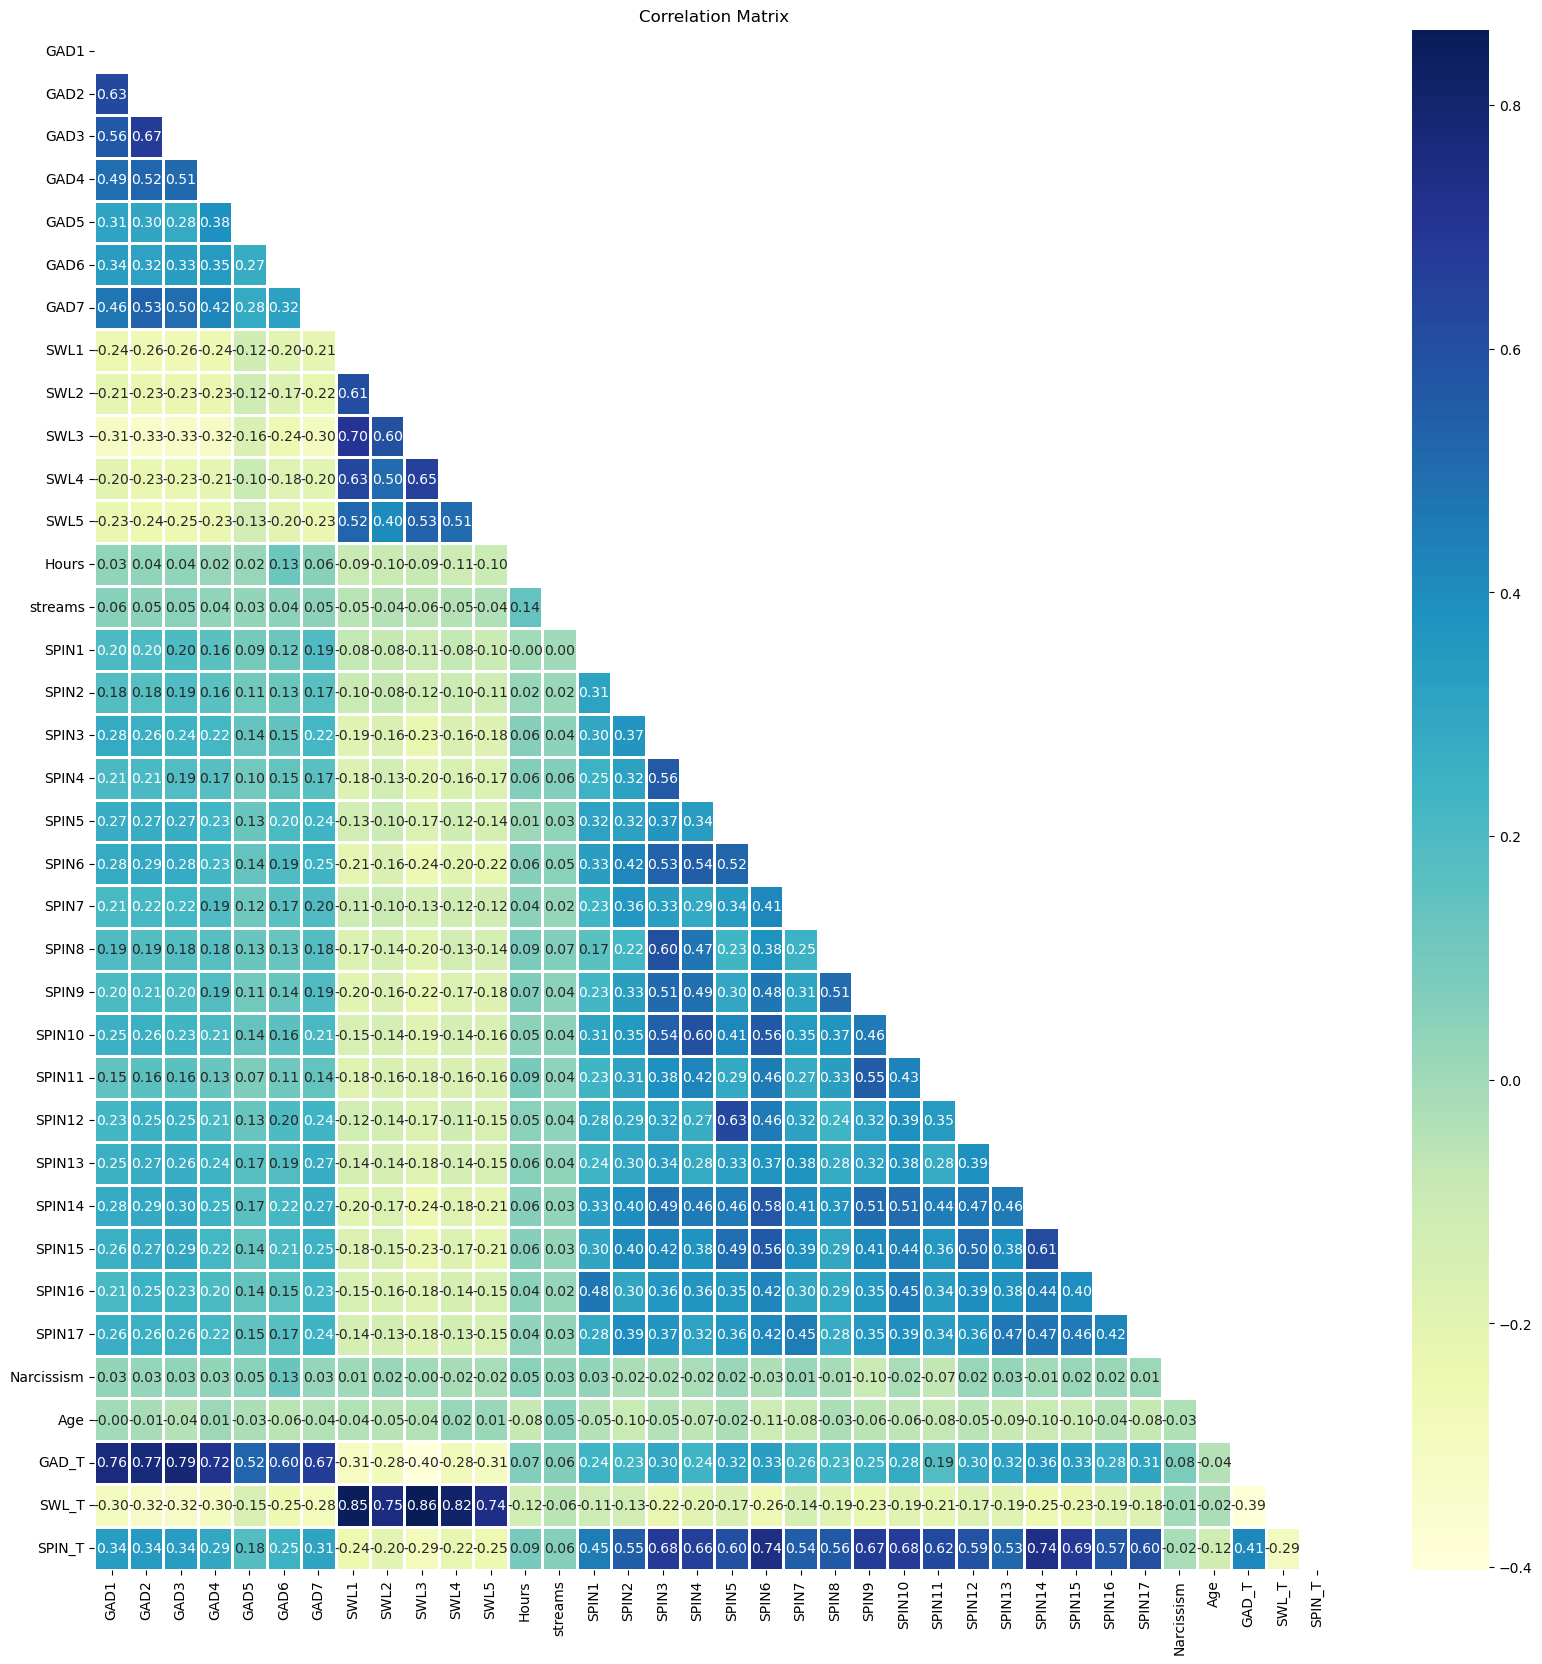

In [82]:
corr = df.corr(method = 'spearman')
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize = (20,20))
corr_mat = sns.heatmap(corr,mask = mask, annot = True,linewidths = 1, fmt = '.2f', cmap='YlGnBu')
corr_mat.set_title("Correlation Matrix")
plt.show()

In [83]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Reference',
       'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3'],
      dtype='object')

<Figure size 2000x300 with 0 Axes>

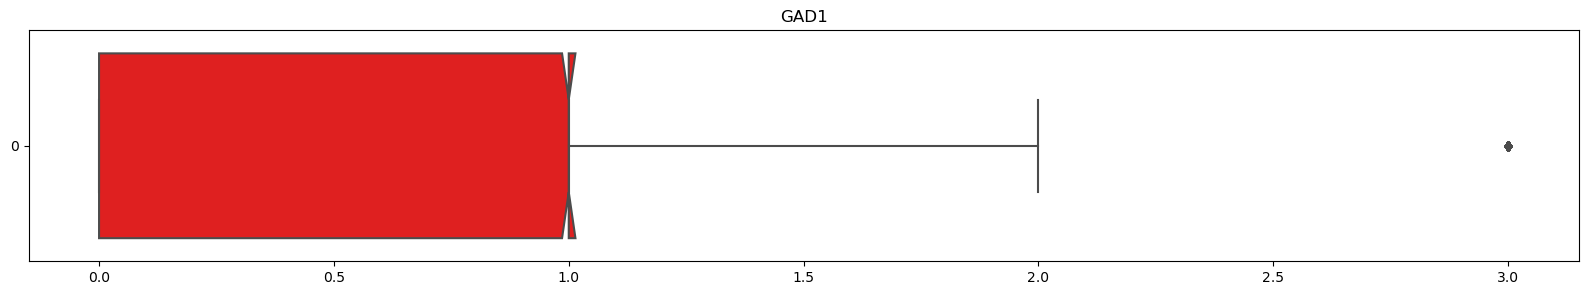

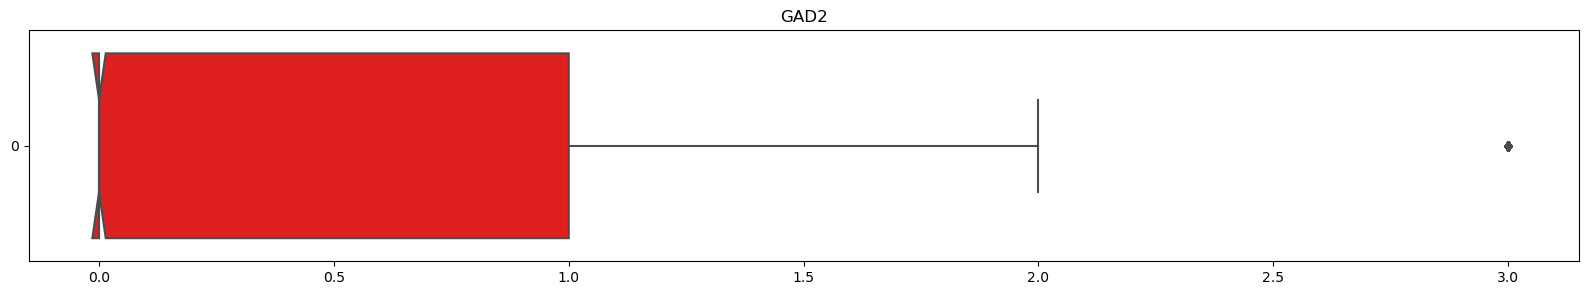

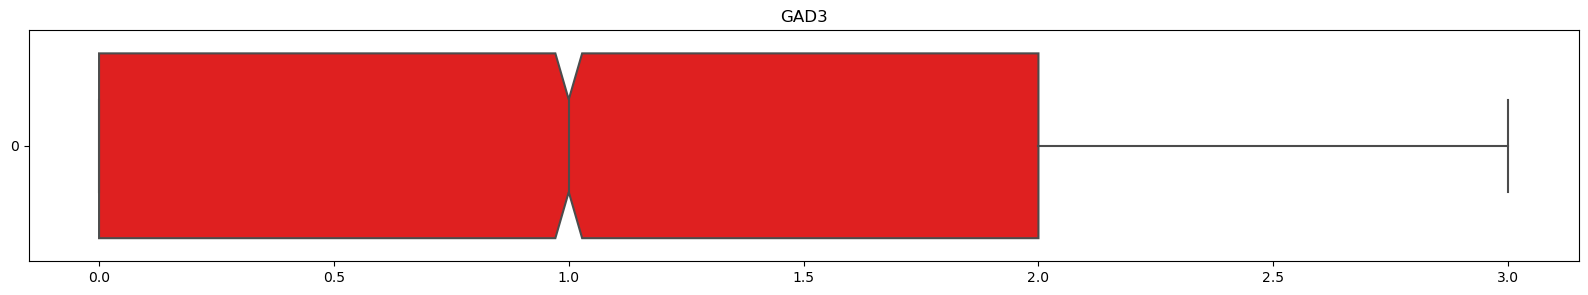

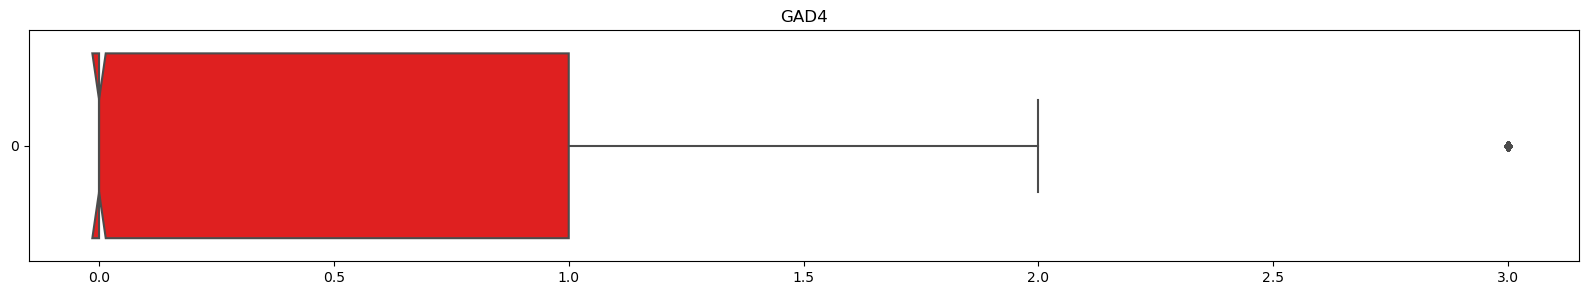

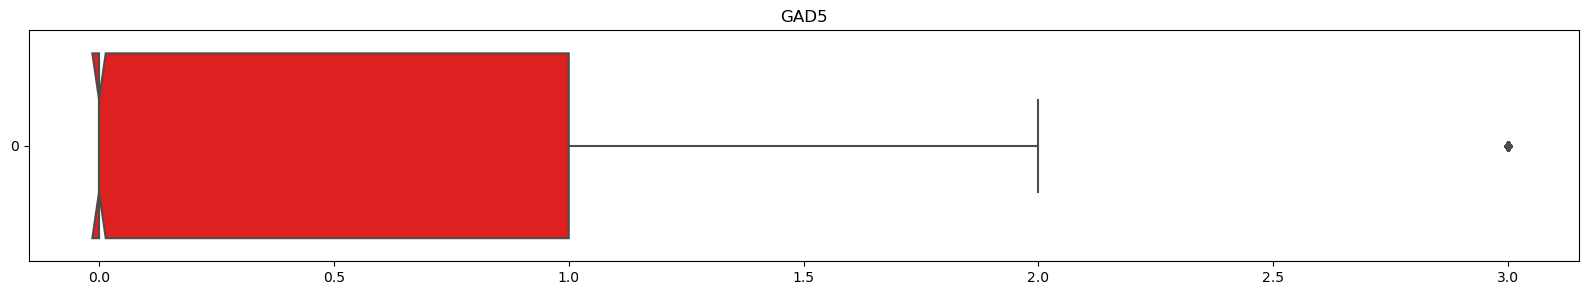

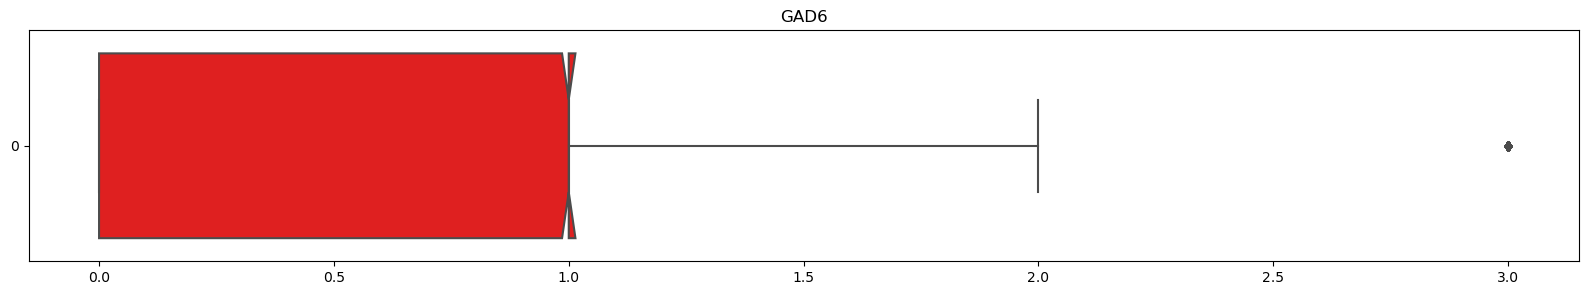

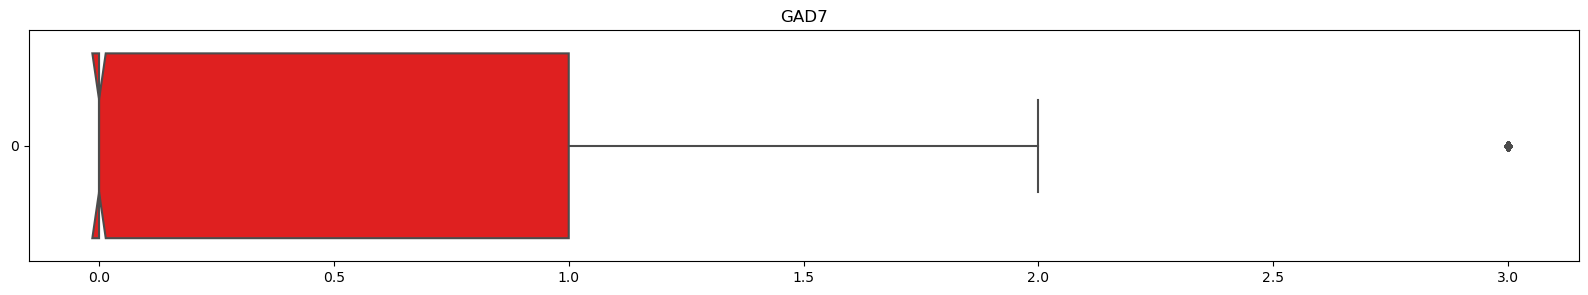

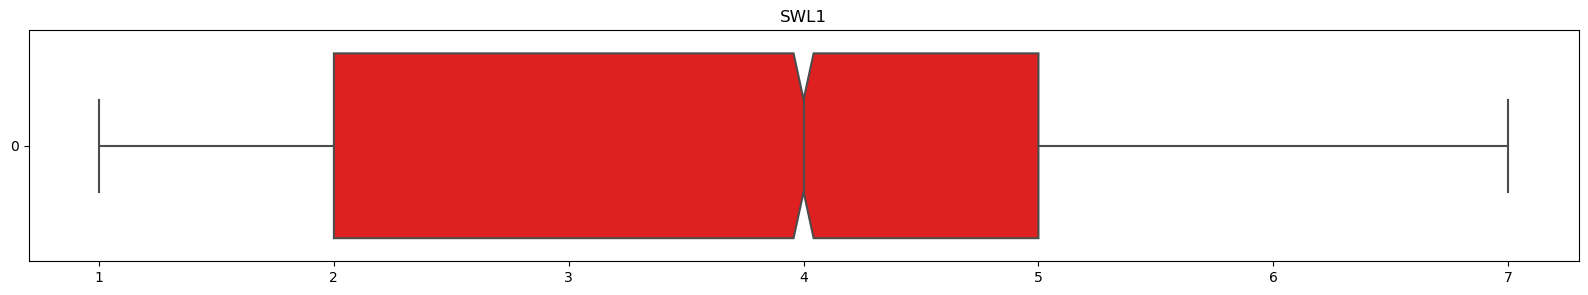

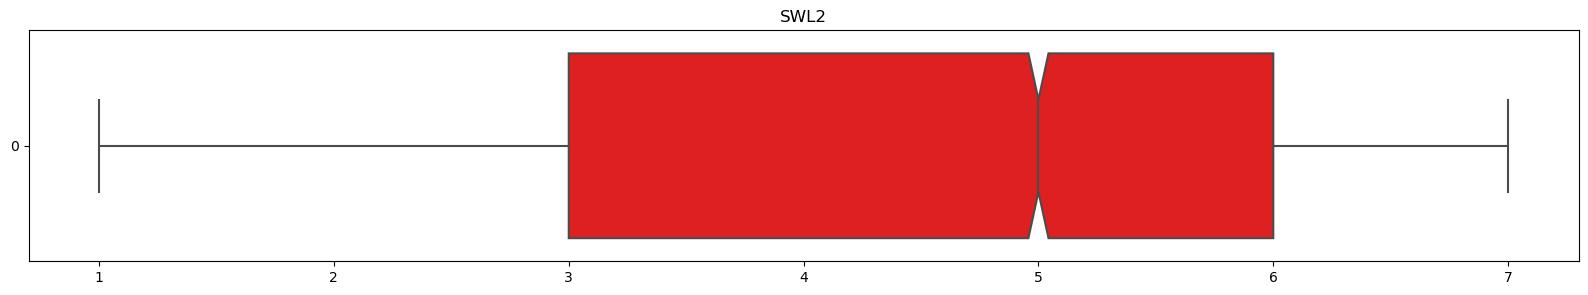

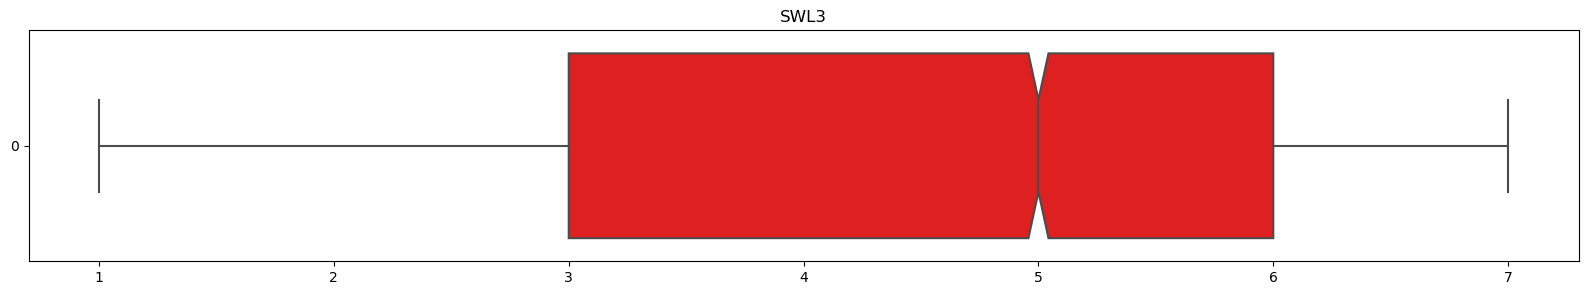

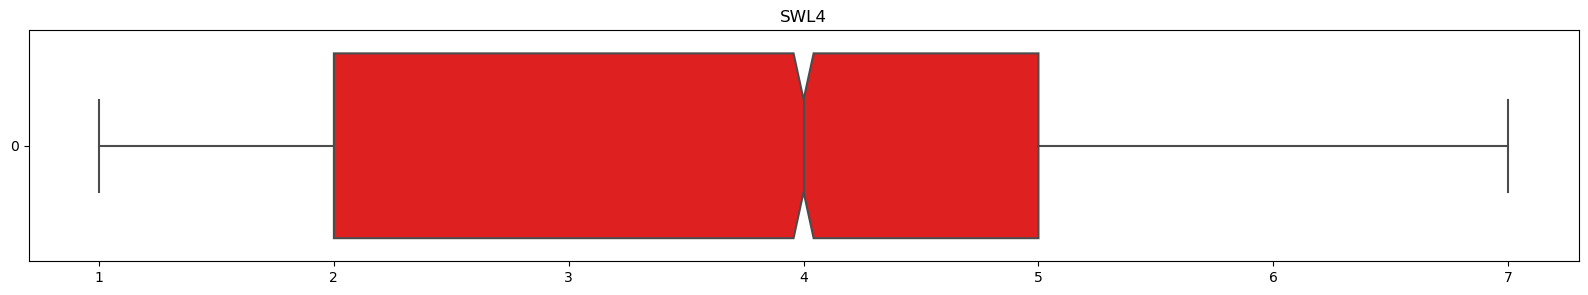

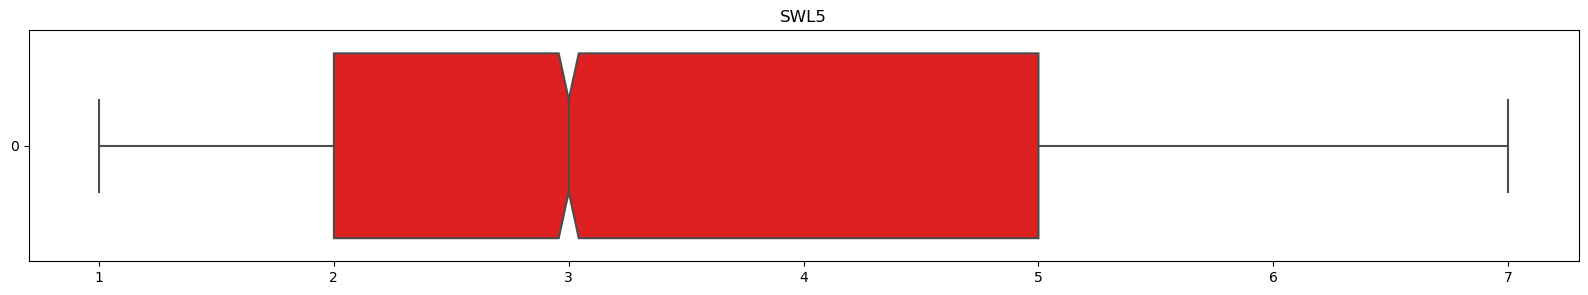

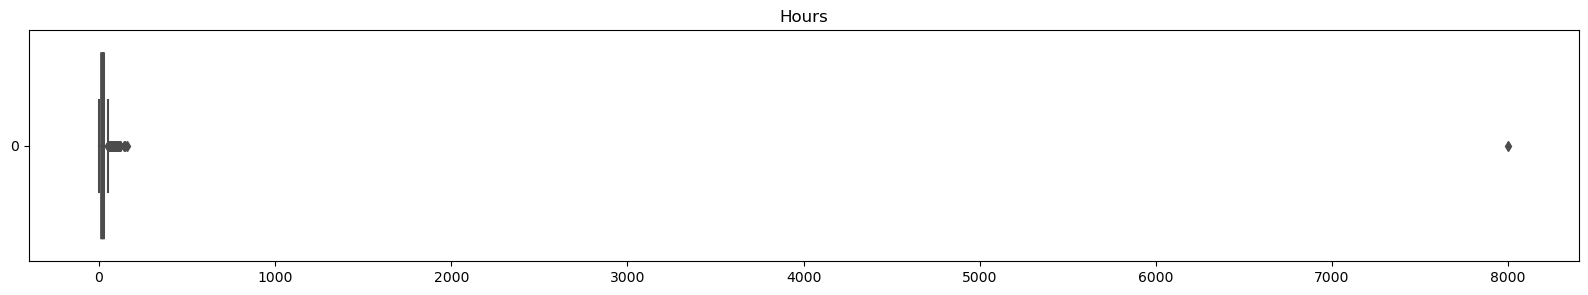

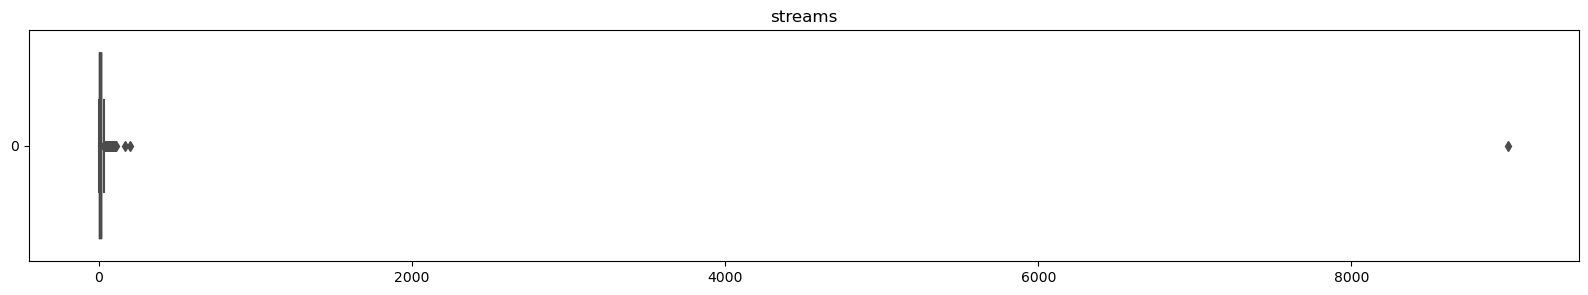

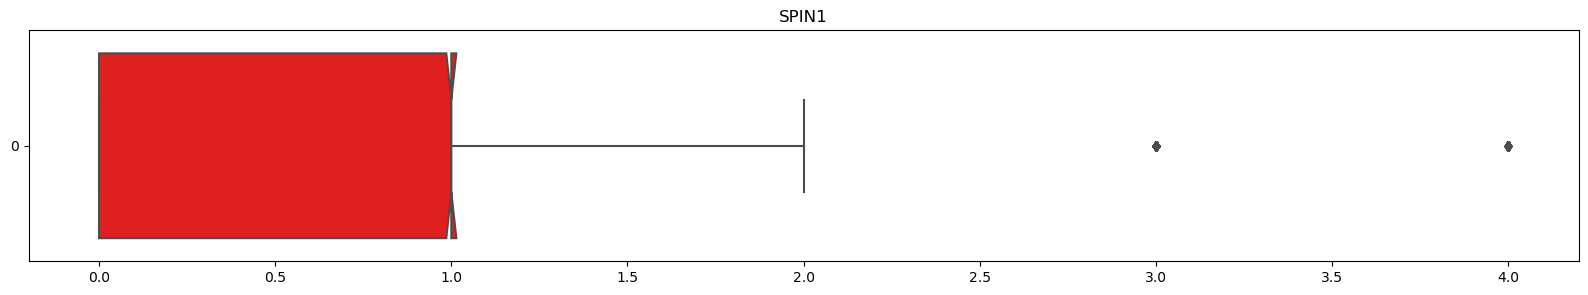

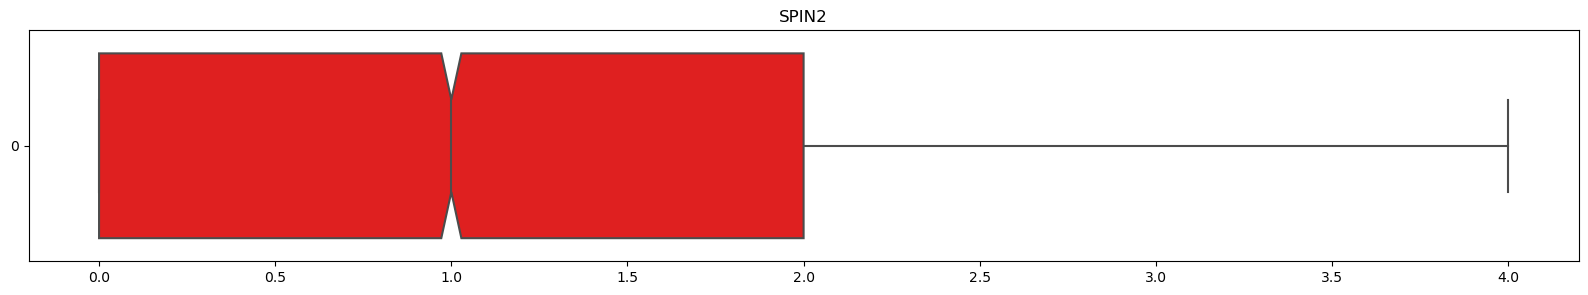

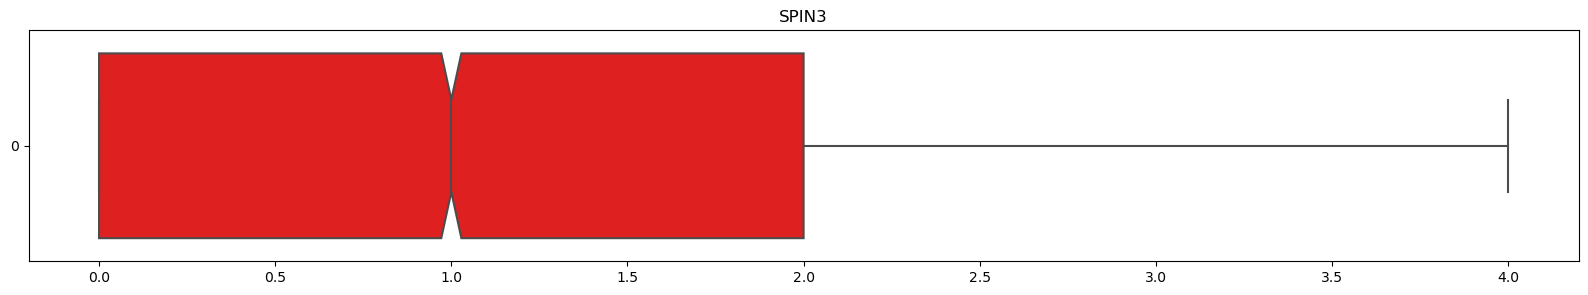

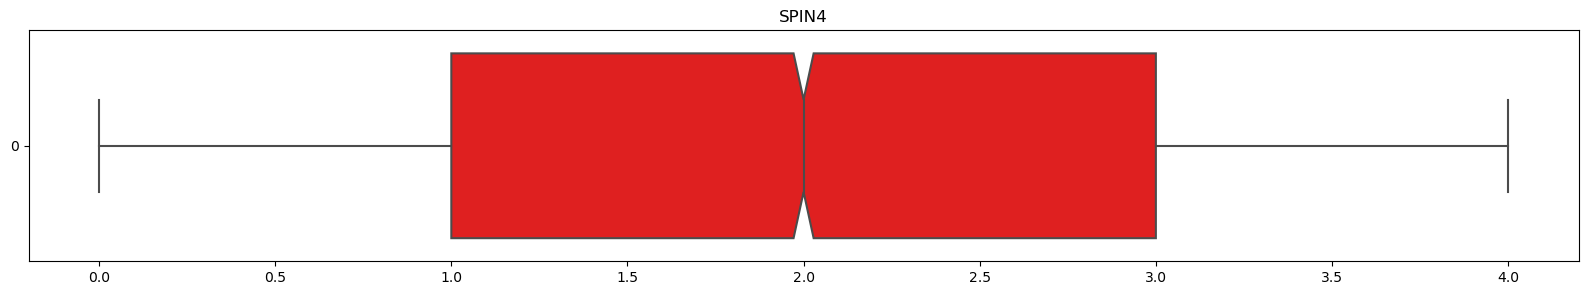

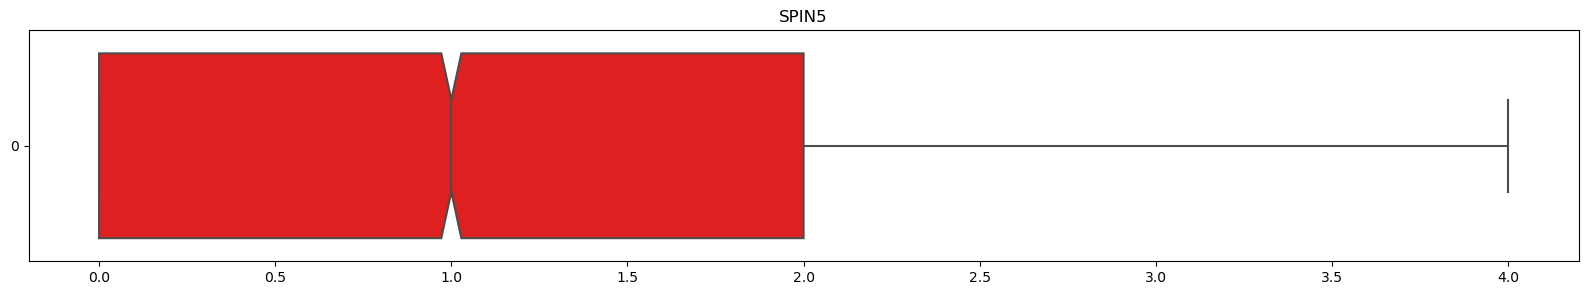

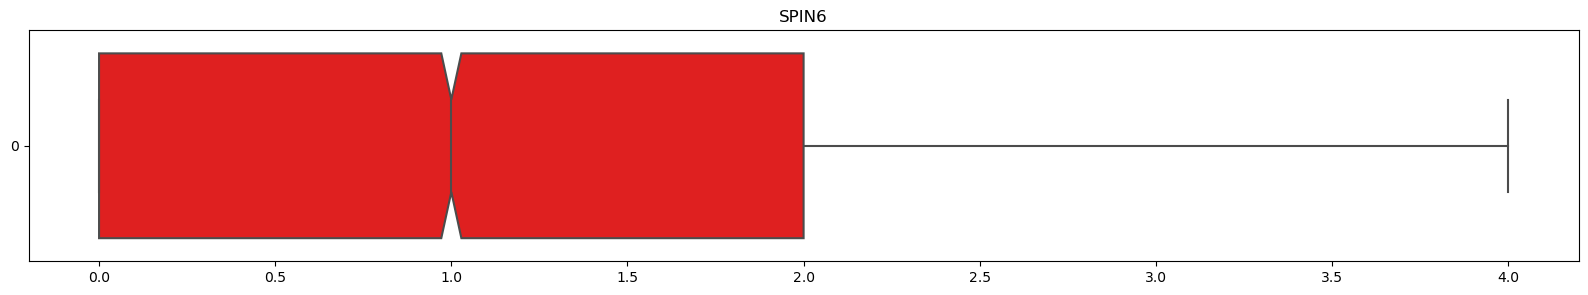

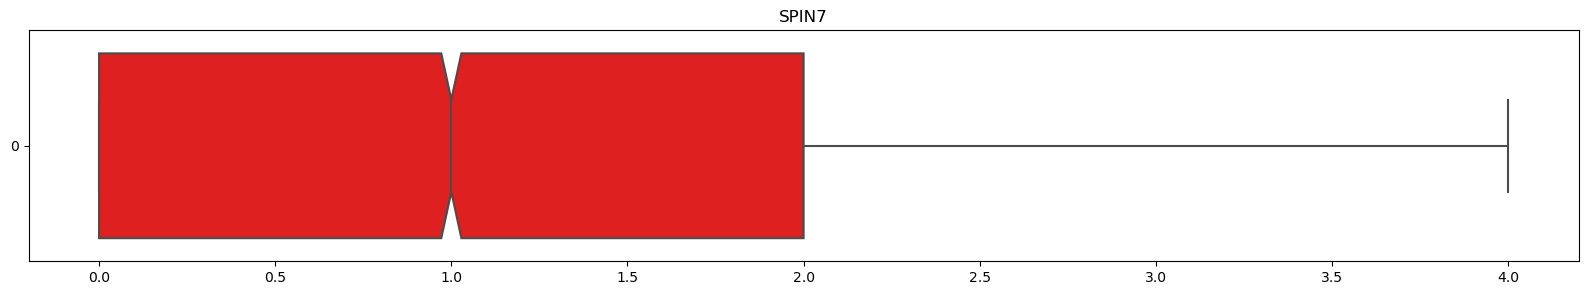

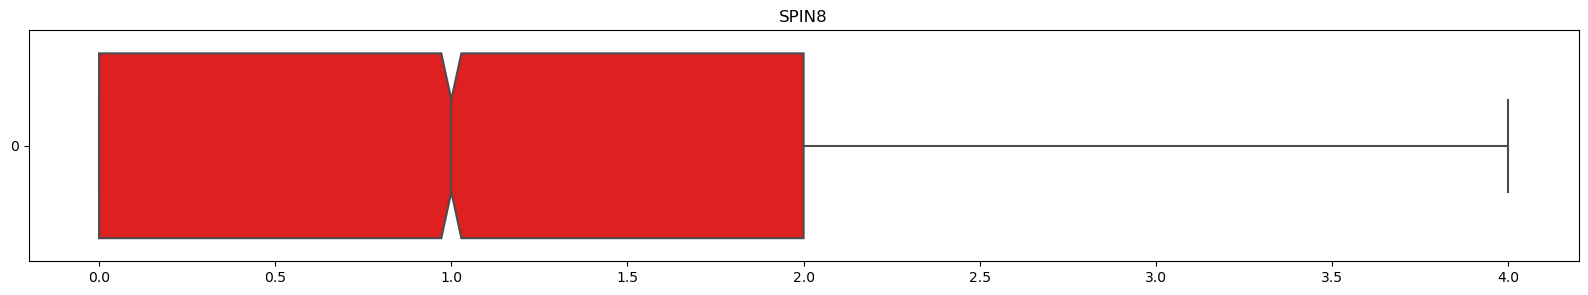

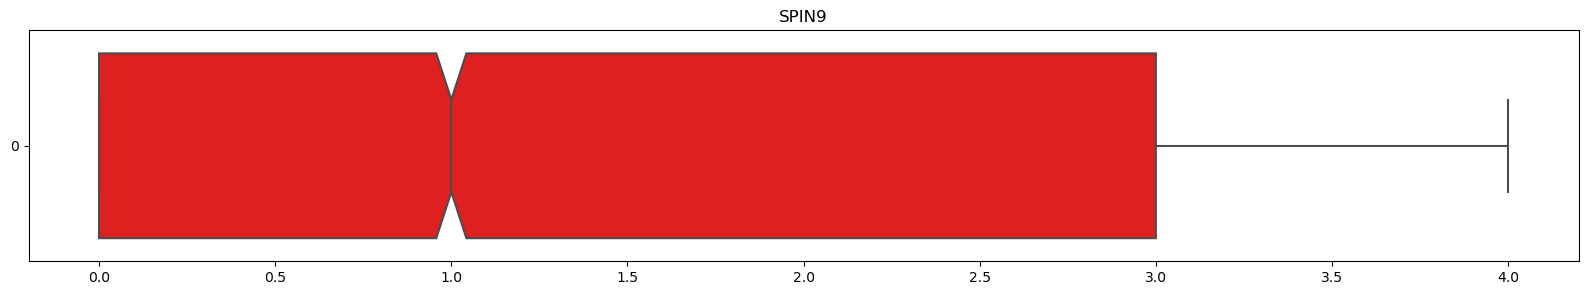

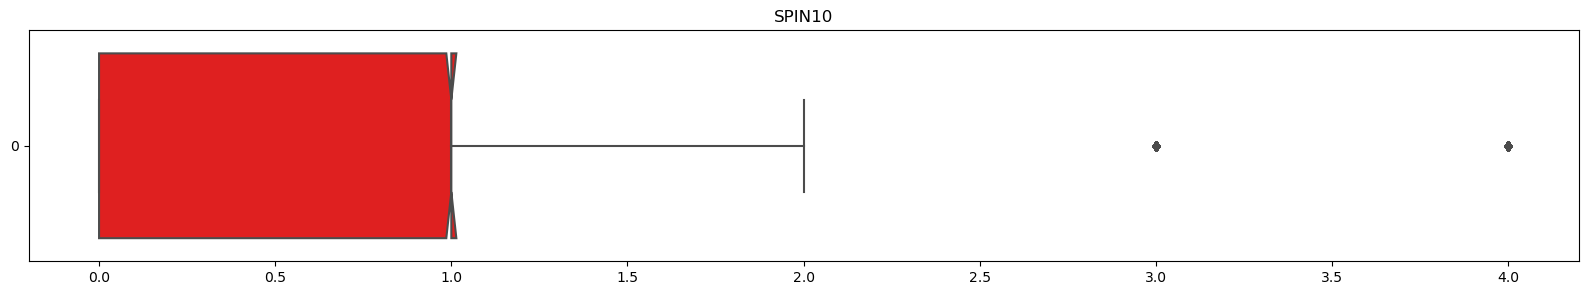

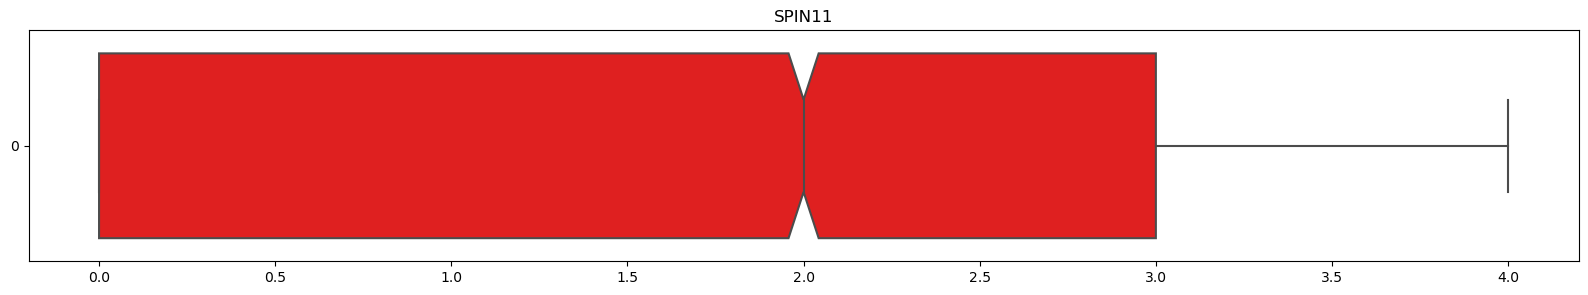

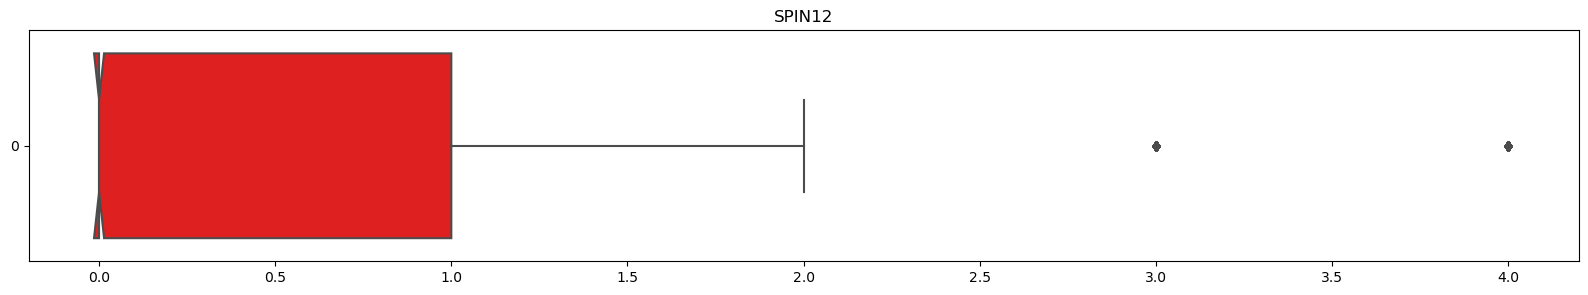

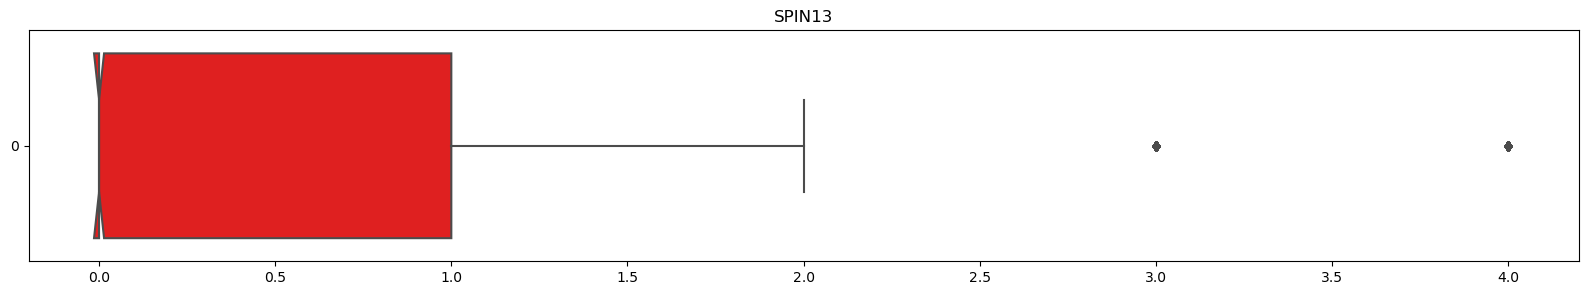

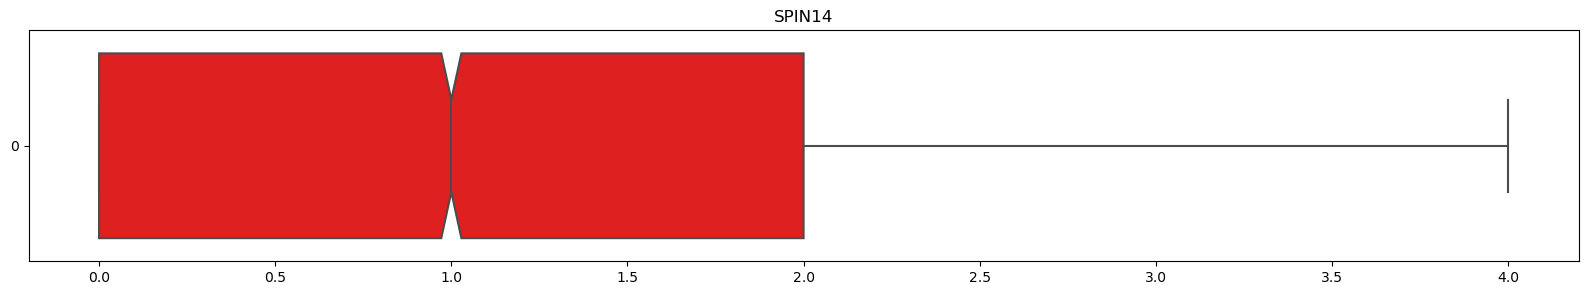

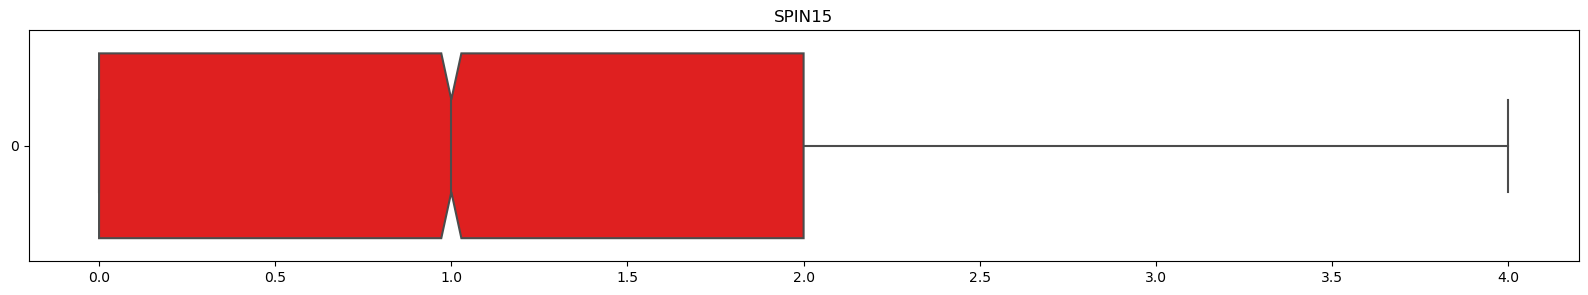

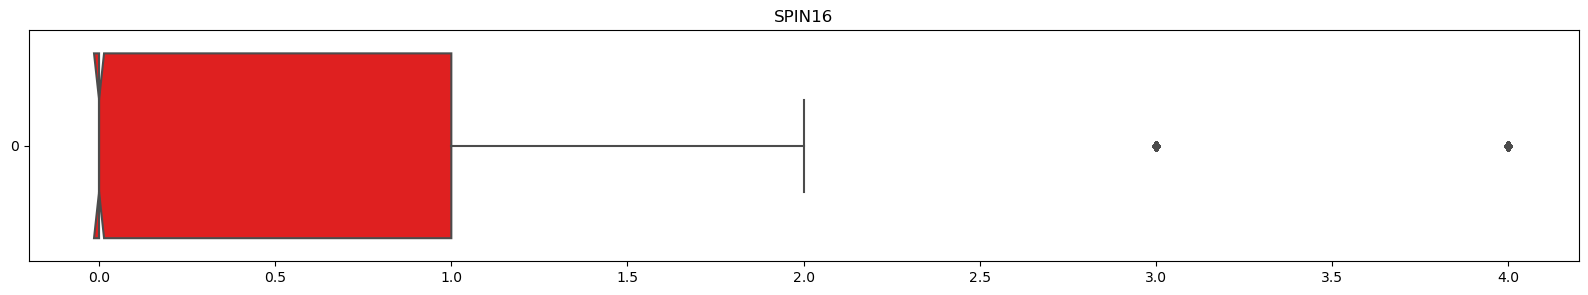

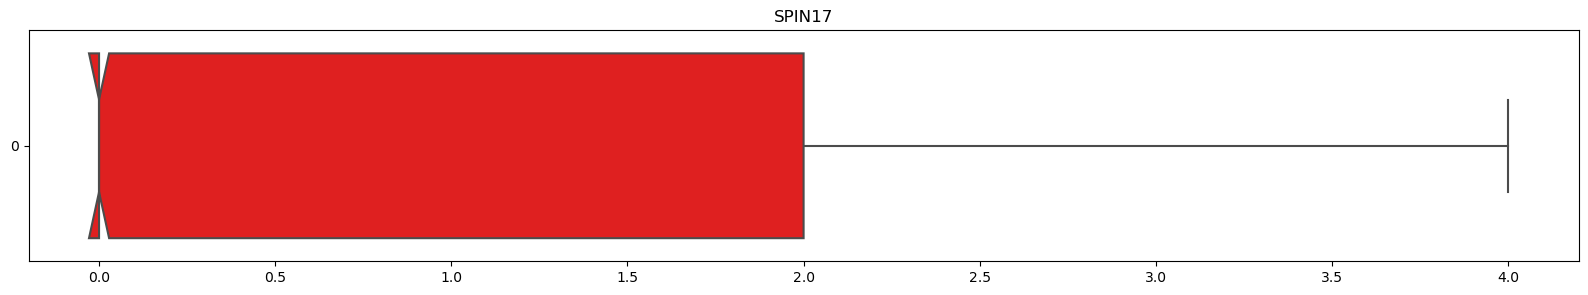

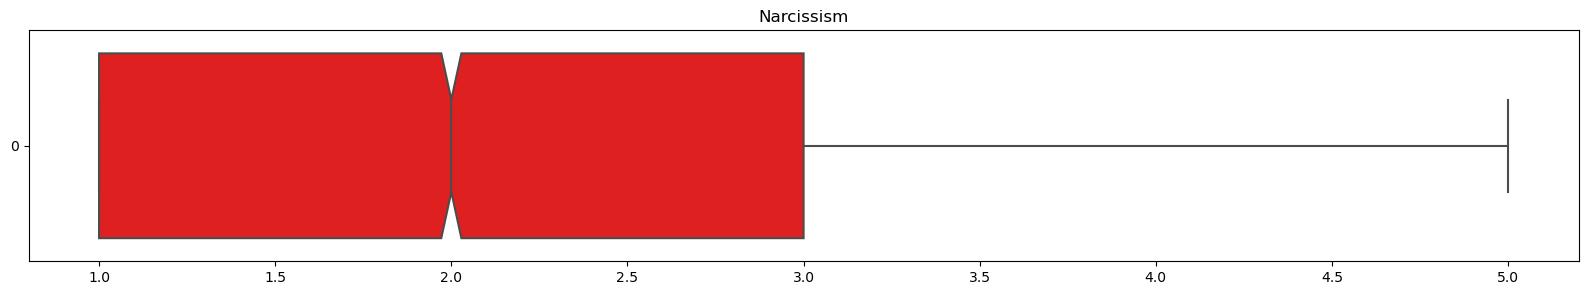

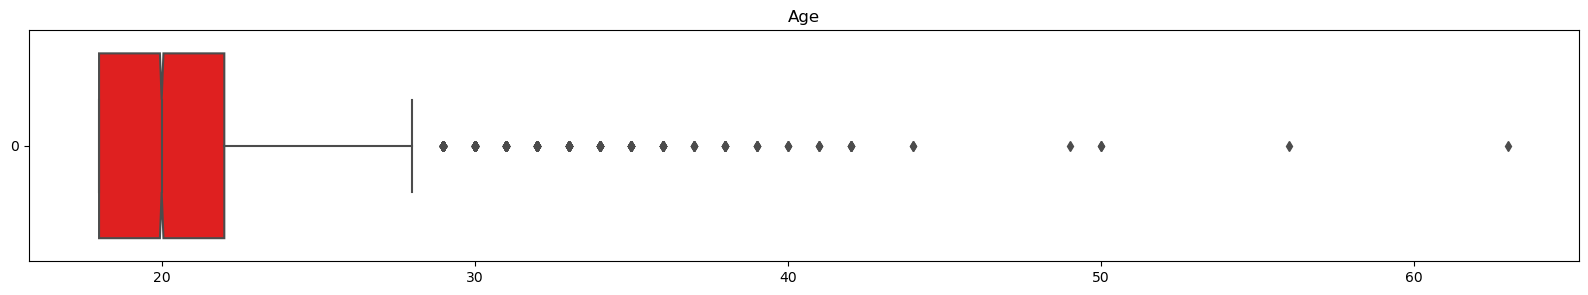

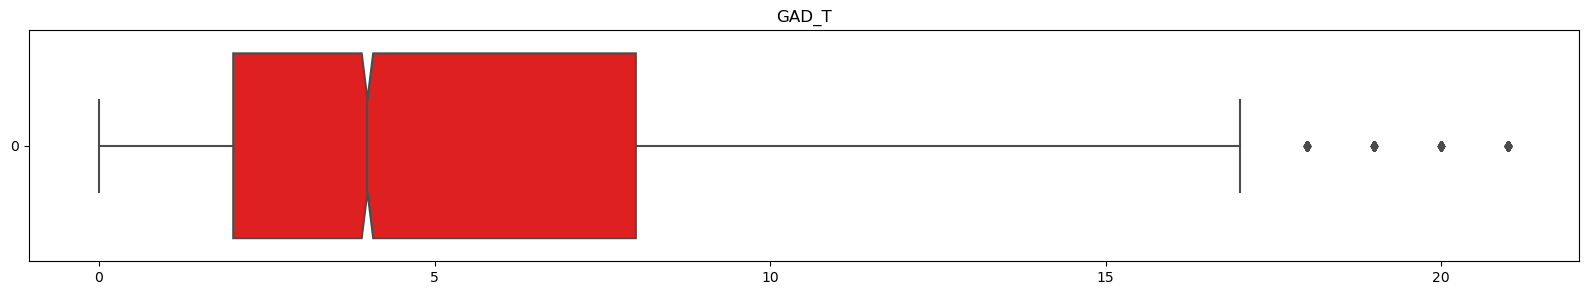

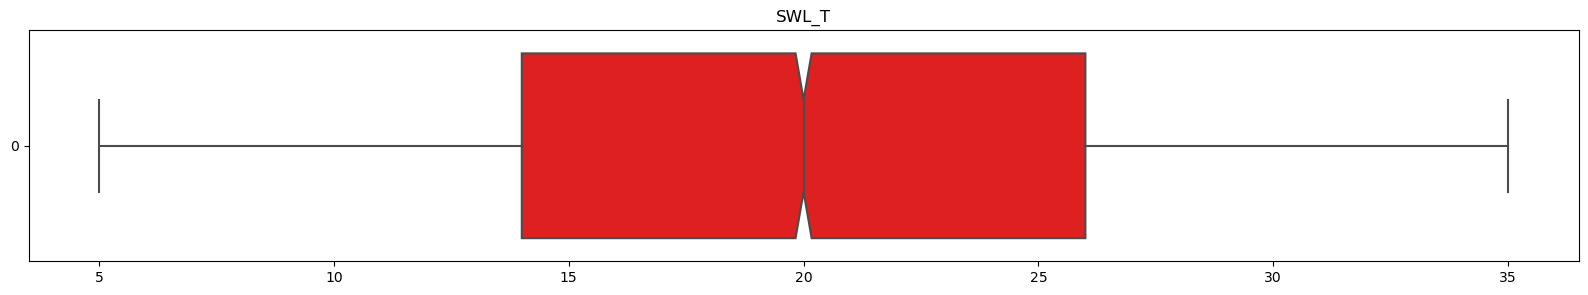

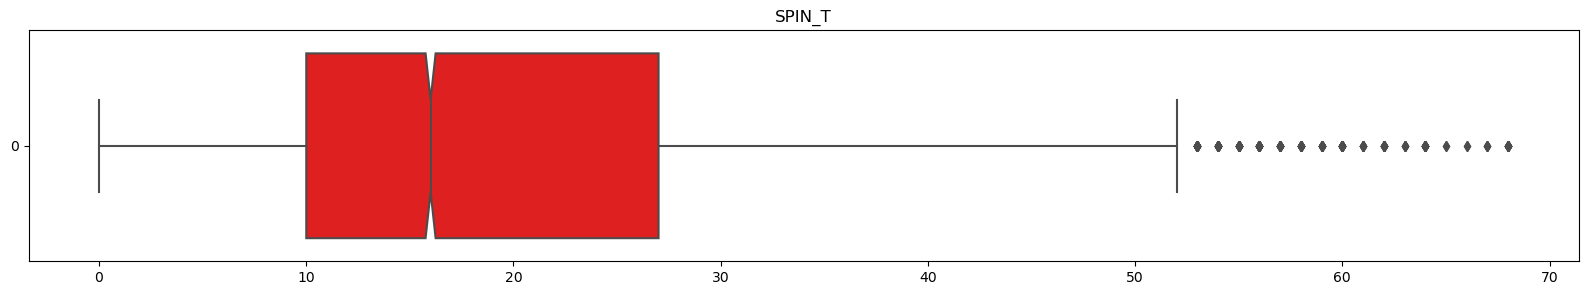

In [84]:
plt.figure(figsize = (20,3))
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize = (20,3))
        sns.boxplot(df[col],orient = 'h',showfliers = True,notch = True,color = 'red')
        plt.title(col)
        plt.show()
# len(df.columns)

# Removing Outlier

In [85]:
df_Q1 = df.quantile(0.25)
df_Q3 = df.quantile(0.75)
df_IQR = df_Q3 - df_Q1

In [86]:
df = df[~((df<(df_Q1-1.5*df_IQR))|(df>(df_Q3+1.5*df_IQR))).any(axis = 1)]

In [87]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Reference',
       'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3'],
      dtype='object')

<h2>Attribute Information</h2>
<table style = "width:100%; font-size:15px">
    <tr>
        <th>Column Name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>GAD1</td>
        <td>Generalized Anxiety Disorder Question 1</td>
    </tr>
    <tr>
        <td>GAD2</td>
        <td>Generalized Anxiety Disorder Question 2</td>
    </tr>
    <tr>
        <td>GAD3</td>
        <td>Generalized Anxiety Disorder Question 3</td>
    </tr>
    <tr>
        <td>GAD4</td>
        <td>Generalized Anxiety Disorder Question 4</td>
    </tr>
    <tr>
        <td>GAD5</td>
        <td>Generalized Anxiety Disorder Question 5</td>
    </tr>
    <tr>
        <td>GAD6</td>
        <td>Generalized Anxiety Disorder Question 6</td>
    </tr>
    <tr>
        <td>GAD7</td>
        <td>Generalized Anxiety Disorder Question 7</td>
    </tr>
    <tr>
        <td>GADE</td>
        <td>Generalized Anxiety Disorder Examination (Total Score)</td>
    </tr>
    <tr>
        <td>SWL1</td>
        <td>Satisfaction With Life Question 1</td>
    </tr>
    <tr>
        <td>SWL2</td>
        <td>Satisfaction With Life Question 2</td>
    </tr>
    <tr>
        <td>SWL3</td>
        <td>Satisfaction With Life Question 3</td>
    </tr>
    <tr>
        <td>SWL4</td>
        <td>Satisfaction With Life Question 4</td>
    </tr>
    <tr>
        <td>SWL5</td>
        <td>Satisfaction With Life Question 5</td>
    </tr>
    <tr>
        <td>Game</td>
        <td>Name of the Game Being Played</td>
    </tr>
    <tr>
        <td>Platform</td>
        <td>Gaming Platform Used</td>
    </tr>
    <tr>
        <td>Hours</td>
        <td>Number of Hours Spent Gaming</td>
    </tr>
    <tr>
        <td>Earnings</td>
        <td>Earnings from Gaming</td>
    </tr>
    <tr>
        <td>Whyplay</td>
        <td>Reasons for Playing Games</td>
    </tr>
    <tr>
        <td>League</td>
        <td>Gaming League Participation</td>
    </tr>
    <tr>
        <td>Streams</td>
        <td>Game Streaming Frequency</td>
    </tr>
    <tr>
        <td>SPIN1 to SPIN17</td>
        <td>Social Phobia Inventory Questions 1 to 17</td>
    </tr>
    <tr>
        <td>Narcissism</td>
        <td>Narcissism Score</td>
    </tr>
    <tr>
        <td>Gender</td>
        <td>Gender of the Participant</td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Age of the Participant</td>
    </tr>
    <tr>
        <td>Work</td>
        <td>Employment Status</td>
    </tr>
    <tr>
        <td>Degree</td>
        <td>Educational Degree</td>
    </tr>
    <tr>
        <td>Reference</td>
        <td>Reference for the Study</td>
    </tr>
    <tr>
        <td>Playstyle</td>
        <td>Gaming Playstyle</td>
    </tr>
    <tr>
        <td>GAD_T</td>
        <td>Total Score for Generalized Anxiety Disorder</td>
    </tr>
    <tr>
        <td>SWL_T</td>
        <td>Total Score for Satisfaction With Life</td>
    </tr>
    <tr>
        <td>SPIN_T</td>
        <td>Total Score for Social Phobia Inventory</td>
    </tr>
    <tr>
        <td>Residence_ISO3</td>
        <td>Residence Location (ISO3 Country Code)</td>
    </tr>
</table>

In [88]:
df[['SPIN_T','GAD_T','SWL_T','Hours']].head()


,SPIN_T,GAD_T,SWL_T,Hours
0,5.0,1,23,15.0
5,13.0,1,17,4.0
7,14.0,0,23,25.0
9,26.0,10,13,25.0
11,3.0,0,33,25.0


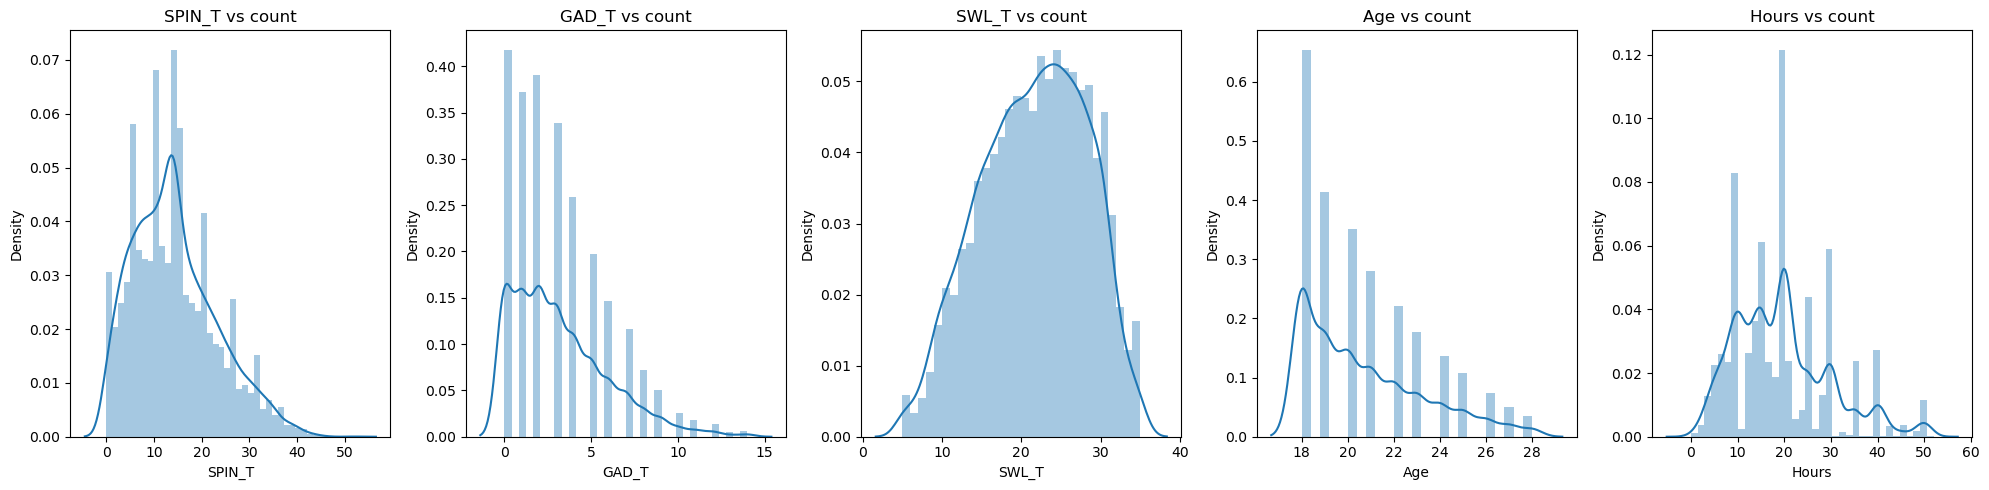

In [89]:
labels = ['SPIN_T', 'GAD_T', 'SWL_T', 'Age', 'Hours']
fig, axes = plt.subplots(1, len(labels), figsize=(20, 5))
for i, col in enumerate(labels):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title(f"{col} vs count")

plt.tight_layout()
plt.show()

# Game Play Vs Anxiety

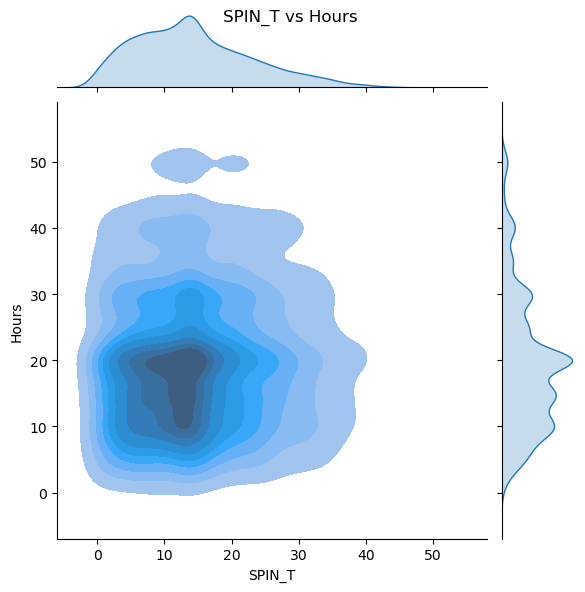

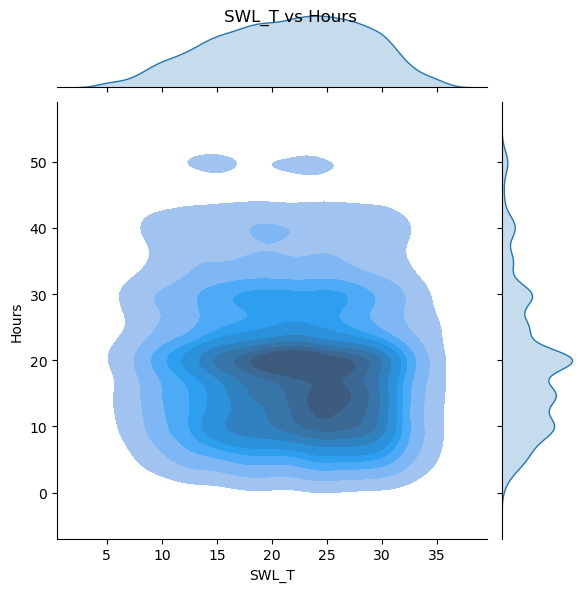

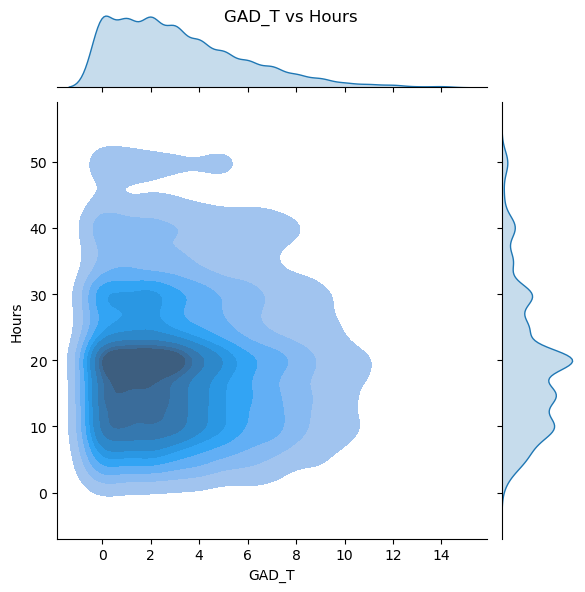

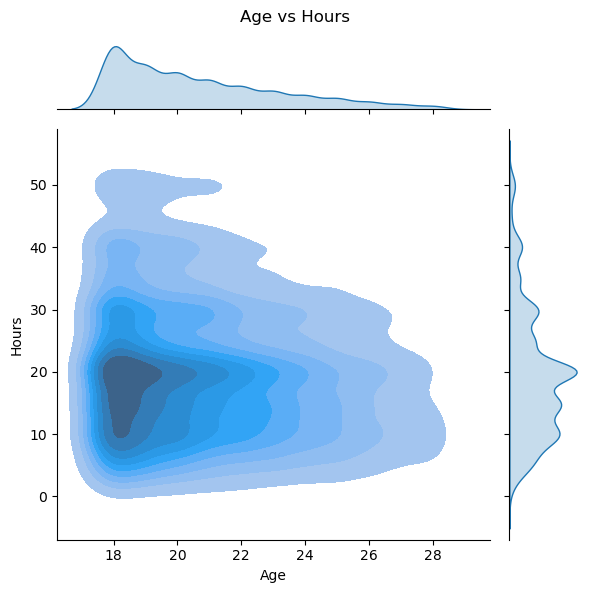

In [90]:
game_label = ['SPIN_T','SWL_T','GAD_T','Age']
# fig, axes = plt.subplots(1,len(game_label),figsize = (15,5))
for i,col in enumerate(game_label):
#     sns.lineplot(x = col, y = 'Hours', data = df,ax = axes[i])
    g = sns.jointplot(x = col, y = 'Hours',data = df, kind = 'kde',fill = True)
    g.set_axis_labels(col, 'Hours') 
    g.fig.suptitle(f'{col} vs Hours', fontsize=12) 
plt.tight_layout()
plt.show()

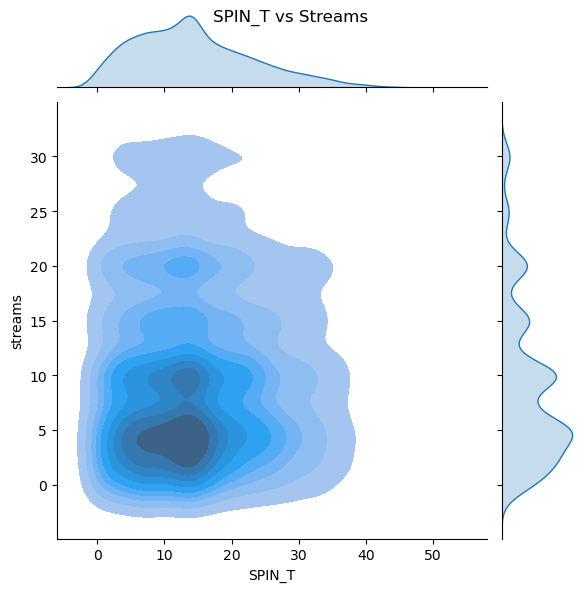

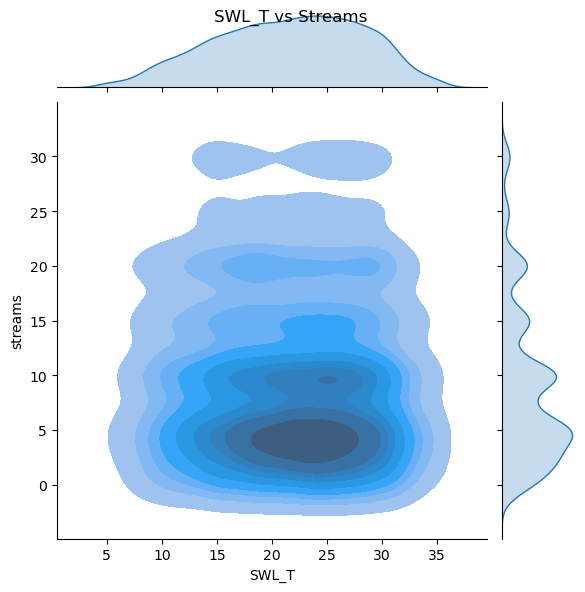

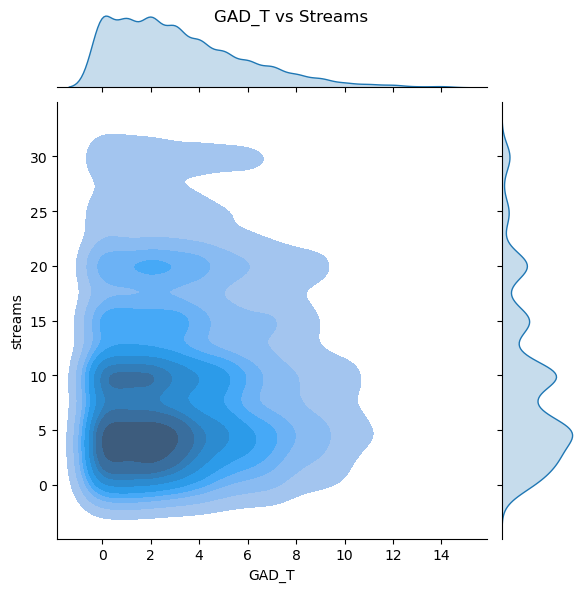

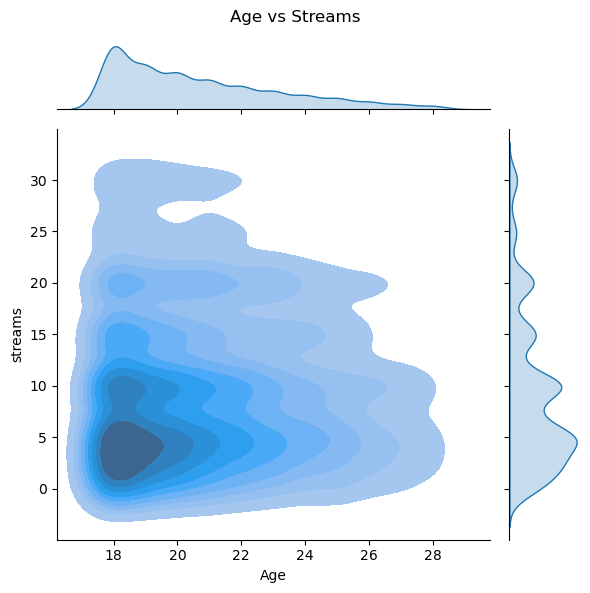

In [91]:

game_label = ['SPIN_T','SWL_T','GAD_T','Age']
for i,col in enumerate(game_label):
#     sns.lineplot(x = col, y = 'streams', data = df,ax = axes[i])
    g = sns.jointplot(x = col, y = 'streams',data = df, kind = 'kde',fill = True)
    g.set_axis_labels(col, 'streams') 
    g.fig.suptitle(f'{col} vs Streams', fontsize=12) 
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age vs Satisfaction with life')

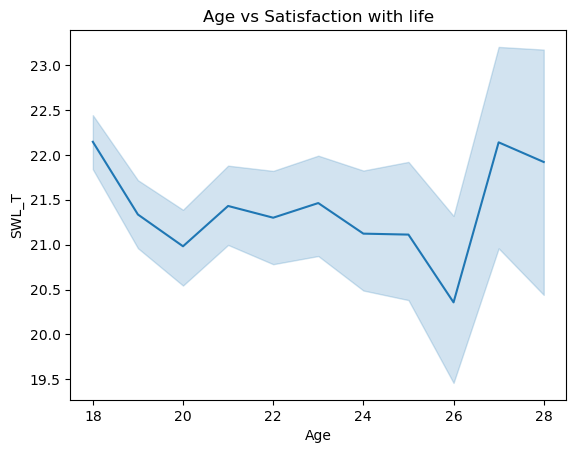

In [92]:
#Age and satisfaction with the life
sns.lineplot(y = df['SWL_T'],x = df['Age'])
plt.title("Age vs Satisfaction with life")

### Degree vs Anxiety 

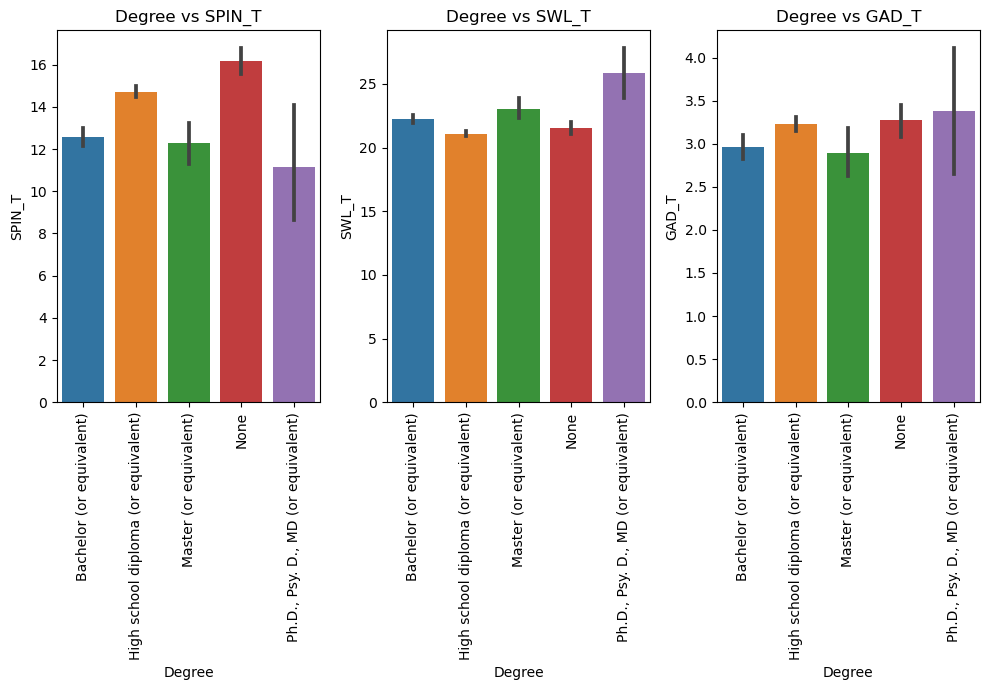

In [93]:
label = ['SPIN_T','SWL_T','GAD_T']
fig, axes = plt.subplots(1,len(label),figsize = (10,7))
for i, col in enumerate(label):
    sns.barplot(x='Degree', y=col, data=df, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Degree vs {col}')
plt.tight_layout()
plt.show()


<p>GAD_T : Total Score for Generalized Anxiety Disorder</p>
<p>SWL_T : Total Score for Satisfaction With Life</p>
<p>SPIN_T : Total Score for Social Phobia Inventory</p>


In [94]:
df.reset_index(inplace = True)

In [95]:
df.drop('index',axis = 1,inplace = True)

## Generalized Anxiety Disorder Examination (Total Score) vs Anxiety, Satisfaction of Life

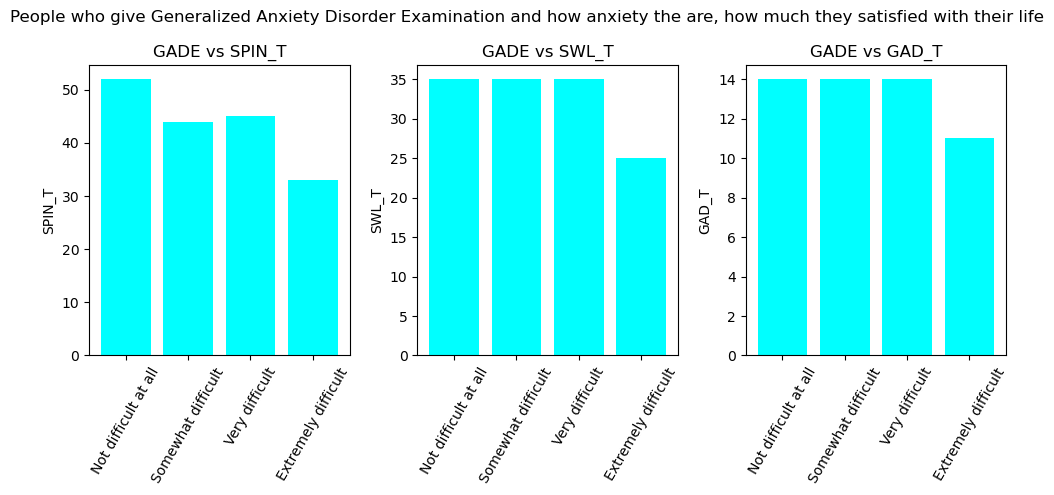

In [96]:
label = ['SPIN_T','SWL_T','GAD_T']
fig, axes = plt.subplots(1,len(label),figsize = (10,5))
fig.suptitle("People who give Generalized Anxiety Disorder Examination and how anxiety the are, how much they satisfied with their life")
for i, col in enumerate(label):
    axes[i].bar(df['GADE'],df[col], data=df,color = 'cyan')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=60)
    axes[i].set_ylabel(col)
    axes[i].set_title(f'GADE vs {col}')
plt.tight_layout()
plt.show()

In [97]:
df_work = df.groupby(['Work','Game']).mean()

In [98]:
df_work = df_work.reset_index()

# Extract the 'Work', 'Game', and the column you want to plot
work_values = df_work['Work']
game_values = df_work['Game']
mean_values = df_work['Age']  # Replace 'YourColumnName' with the actual column name


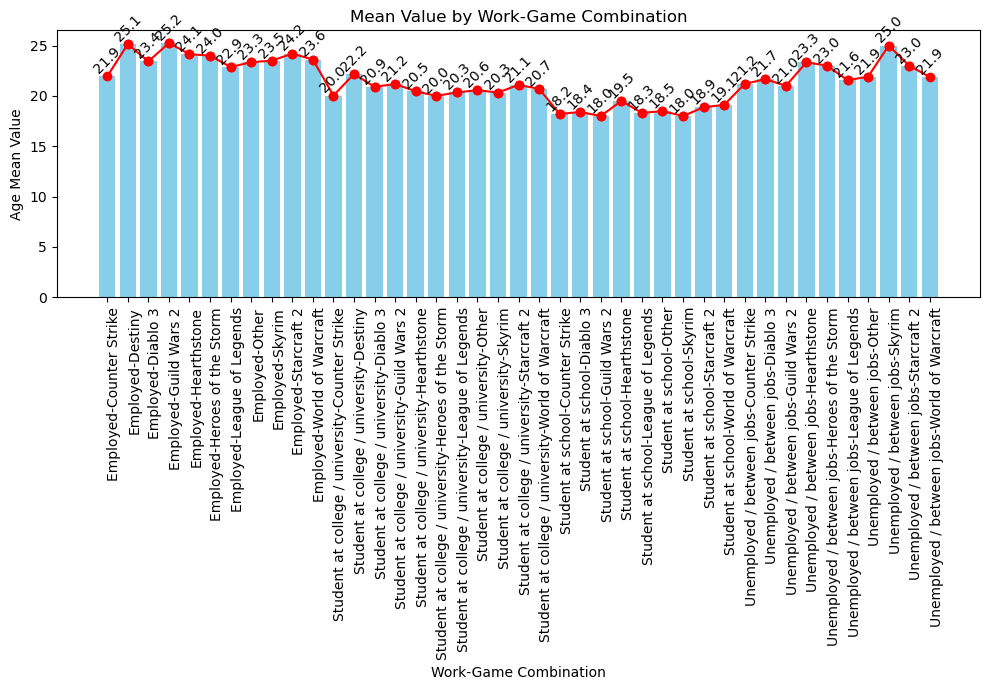

In [99]:

# Create a bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(work_values + '-' + game_values, mean_values,color = 'skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}',ha = 'center', va = 'bottom',
                rotation = 45, fontsize = 10)
for i in range(len(bars) - 1):
    x1 = bars[i].get_x() + bars[i].get_width() / 2
    y1 = bars[i].get_height()
    x2 = bars[i + 1].get_x() + bars[i + 1].get_width() / 2
    y2 = bars[i + 1].get_height()
    plt.plot([x1, x2], [y1, y2], color='red',marker = "o")
# Label the axes and add a title
plt.xlabel('Work-Game Combination')
plt.ylabel('Age Mean Value')
plt.title('Mean Value by Work-Game Combination')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='left')

# Show the plot
plt.tight_layout()
plt.show()


### Staisfaction of Students with their life who are working, having some degree or playing style 

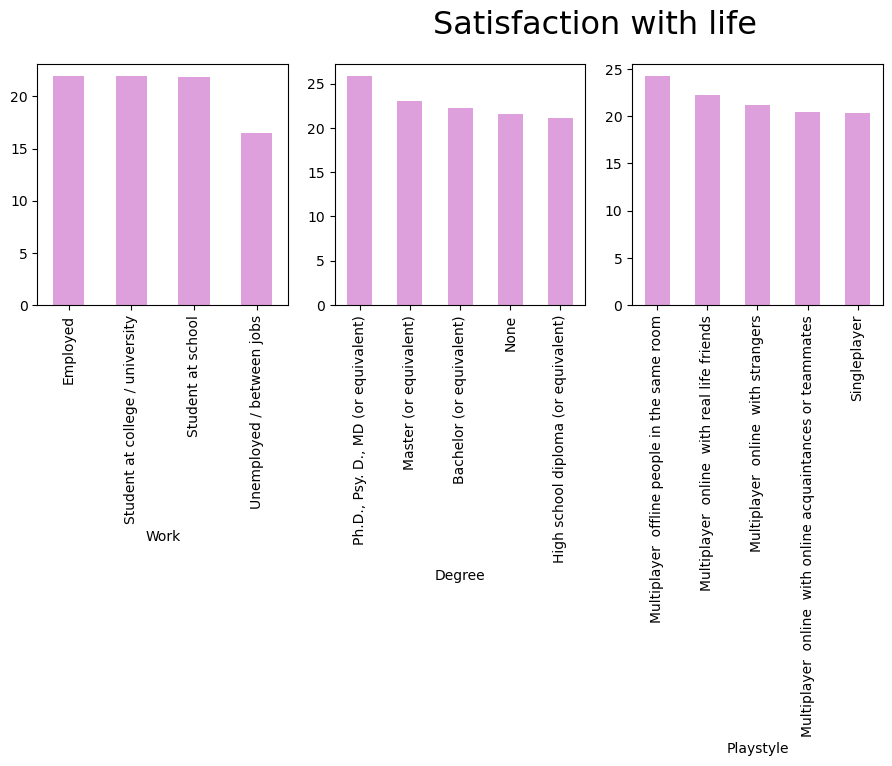

In [100]:
labels = ['Work','Degree','Playstyle']
plt.figure(figsize = (12,6))
plt.suptitle("Satisfaction with life",fontsize = 23)
for i,row in enumerate(labels,1):
    plt.subplot(1 , 4 , i)
    plt.tight_layout()
    bars = df.groupby(row)['SWL_T'].mean().head(10).sort_values(ascending=False).plot(kind = 'bar',color = 'plum')
plt.show()

In [101]:
df.groupby('Game').mean()[['Hours','SWL_T','Age','GAD_T','SPIN_T']]

,Hours,SWL_T,Age,GAD_T,SPIN_T
Game,,,,,
Counter Strike,22.154696,20.839779,19.917127,2.878453,14.359116
Destiny,20.692308,24.769231,23.769231,2.615385,11.692308
Diablo 3,21.184211,20.263158,21.157895,2.947368,17.105263
Guild Wars 2,19.227273,23.454545,21.318182,2.318182,13.636364
Hearthstone,16.408163,21.857143,21.040816,3.755102,14.204082
Heroes of the Storm,19.666667,21.166667,21.722222,2.555556,13.888889
League of Legends,19.283436,21.493004,20.607712,3.178002,14.309958
Other,19.750507,21.314402,21.018256,3.056795,14.746450
Skyrim,16.000000,25.083333,20.666667,2.666667,14.333333


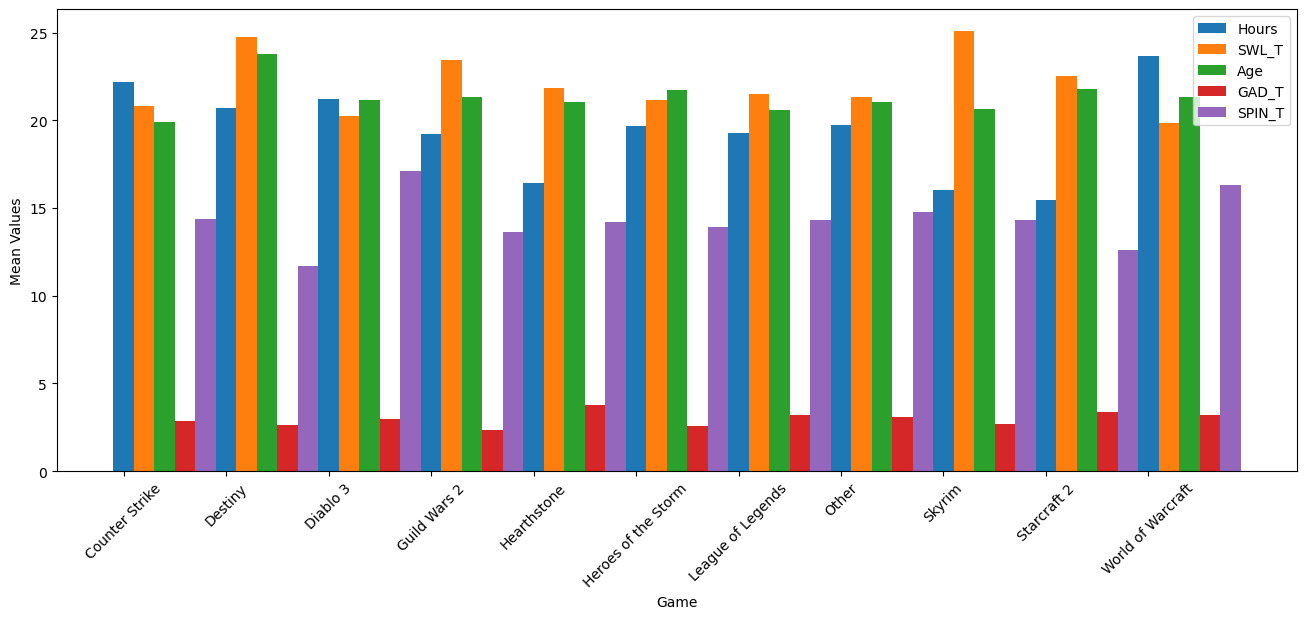

In [102]:
plt.figure(figsize=(16, 6))
bar_width = 0.2
grouped_mean = df.groupby('Game').mean()[['Hours', 'SWL_T', 'Age', 'GAD_T', 'SPIN_T']]
num_categories = len(grouped_mean.index)
x_positions = range(num_categories)
for i, column in enumerate(grouped_mean.columns):
    plt.bar(
        [x + i * bar_width for x in x_positions],
        grouped_mean[column],
        width=bar_width,
        label=column
    )
plt.xticks(x_positions, grouped_mean.index,rotation = 45)
plt.xlabel('Game')
plt.ylabel('Mean Values')
plt.legend()
plt.show()


In [103]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,Singleplayer,1,23,5.0,USA
1,0,0,0,0,0,1,0,Not difficult at all,3,5,3,3,3,Other,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,gold,0.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,Male,24,Employed,Bachelor (or equivalent),Reddit,Multiplayer online with real life friends,1,17,13.0,USA
2,0,0,0,0,0,0,0,Somewhat difficult,3,6,4,3,7,Other,"Console (PS, Xbox, ...)",25.0,I play for fun,having fun,unranked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Female,23,Employed,Bachelor (or equivalent),Reddit,Singleplayer,0,23,14.0,JPN
3,2,1,2,2,2,1,0,Somewhat difficult,3,3,3,2,2,World of Warcraft,PC,25.0,I play for fun,improving,gold,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,2.0,2.0,3.0,1.0,0.0,3.0,2.0,0.0,2.0,1.0,Female,27,Employed,High school diploma (or equivalent),Reddit,Multiplayer online with online acquaintances...,10,13,26.0,FIN
4,0,0,0,0,0,0,0,Somewhat difficult,7,7,7,5,7,League of Legends,PC,25.0,I play for fun,having fun,gold,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Male,25,Employed,Bachelor (or equivalent),Reddit,Multiplayer online with real life friends,0,33,3.0,USA


[]

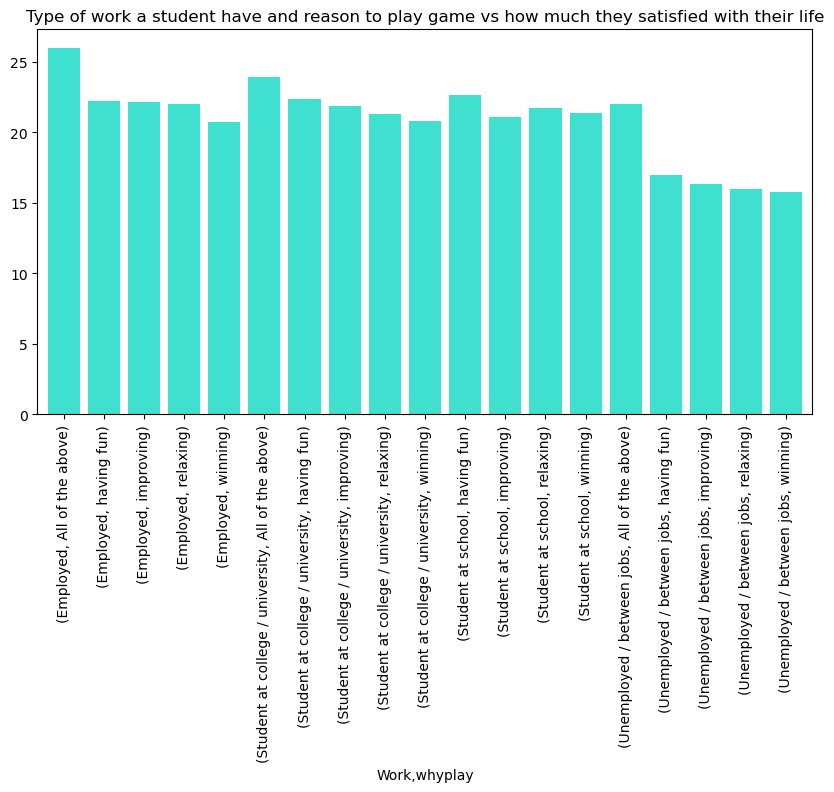

In [104]:

plt.figure(figsize = (10,5))
df.groupby(['Work','whyplay']).mean()['SWL_T'].plot(kind = 'bar',width = 0.8,color = 'turquoise')
plt.title('Type of work a student have and reason to play game vs how much they satisfied with their life')
plt.plot()

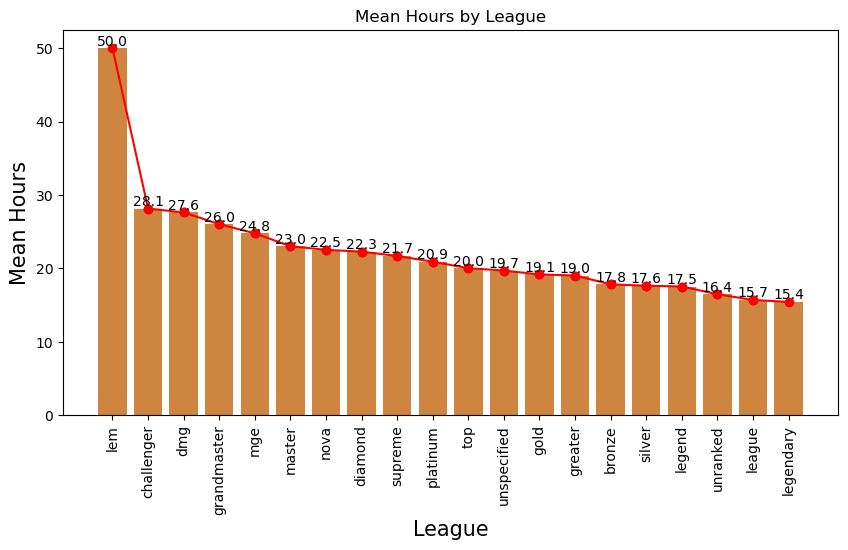

In [105]:
plt.figure(figsize=(10, 5))
league_means = df.groupby('League').mean()['Hours'].sort_values(ascending=False)
bars = plt.bar(league_means.index, league_means.values,color = 'peru')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)
for i in range(len(bars) - 1):
    x1 = bars[i].get_x() + bars[i].get_width() / 2
    y1 = bars[i].get_height()
    x2 = bars[i + 1].get_x() + bars[i + 1].get_width() / 2
    y2 = bars[i + 1].get_height()
    plt.plot([x1, x2], [y1, y2], color='red', marker="o")
plt.xlabel('League',fontdict = {'fontsize':15,'fontweight':0.4})
plt.ylabel('Mean Hours',fontdict = {'fontsize':15,'fontweight':0.4})
plt.title('Mean Hours by League')
plt.xticks(rotation = 90)
plt.show()


'''
GAD_T	Total Score for Generalized Anxiety Disorder<br>
SWL_T	Total Score for Satisfaction With Life<br>
SPIN_T	Total Score for Social Phobia Inventory<br>
'''

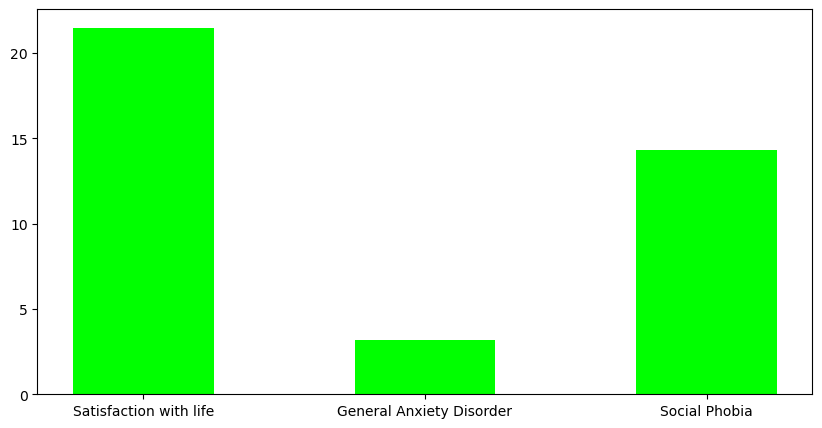

In [106]:
x = df['SWL_T'].mean()
y = df['GAD_T'].mean()
z = df['SPIN_T'].mean()
c = [x,y,z]
plt.figure(figsize = (10,5))
plt.bar(['Satisfaction with life','General Anxiety Disorder','Social Phobia'],c,color = 'lime',width = 0.5)
plt.show()

In [107]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Residence_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,unranked,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Reddit,Singleplayer,1,23,5.0,USA
1,0,0,0,0,0,1,0,Not difficult at all,3,5,3,3,3,Other,"Console (PS, Xbox, ...)",4.0,I play for fun,relaxing,gold,0.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,Male,24,Employed,Bachelor (or equivalent),Reddit,Multiplayer online with real life friends,1,17,13.0,USA
2,0,0,0,0,0,0,0,Somewhat difficult,3,6,4,3,7,Other,"Console (PS, Xbox, ...)",25.0,I play for fun,having fun,unranked,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Female,23,Employed,Bachelor (or equivalent),Reddit,Singleplayer,0,23,14.0,JPN
3,2,1,2,2,2,1,0,Somewhat difficult,3,3,3,2,2,World of Warcraft,PC,25.0,I play for fun,improving,gold,0.0,1.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,2.0,2.0,3.0,1.0,0.0,3.0,2.0,0.0,2.0,1.0,Female,27,Employed,High school diploma (or equivalent),Reddit,Multiplayer online with online acquaintances...,10,13,26.0,FIN
4,0,0,0,0,0,0,0,Somewhat difficult,7,7,7,5,7,League of Legends,PC,25.0,I play for fun,having fun,gold,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Male,25,Employed,Bachelor (or equivalent),Reddit,Multiplayer online with real life friends,0,33,3.0,USA


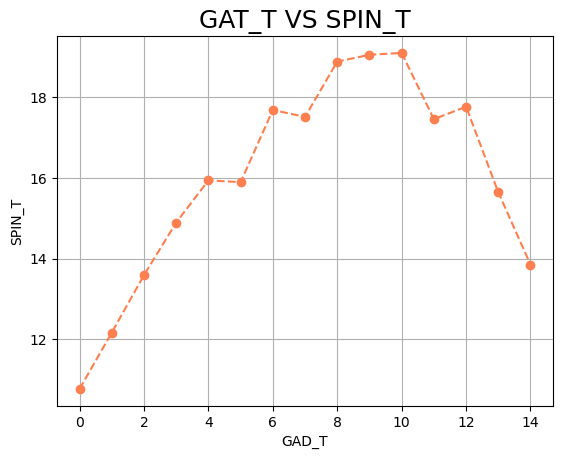

In [108]:
gadt_mean = df.groupby('GAD_T')['SPIN_T'].mean()
plt.plot(gadt_mean.index,gadt_mean.values,marker = 'o',linestyle = '--',color = 'coral')
plt.grid(visible = True,)
plt.xlabel('GAD_T')
plt.ylabel('SPIN_T')
plt.title('GAT_T VS SPIN_T',fontdict = {'fontsize':18,'fontweight':1})
plt.show()